#### Name: Rajnita Leichombam
#### USC-ID : 1370432160
#### Github-Username: Rajnita

# HOMEWORK - 7

## Anuran Cells Dataset - SVMs and K Means Clustering

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from numpy import random
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

### 1(a)
The data is downloaded and put under ../data folder

# Reading Data

In [2]:
data=pd.read_csv('../data/Frogs_MFCCs.csv');
data

MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0          1.0  0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945   
1          1.0  0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835   
2          1.0  0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714   
3          1.0  0.224392  0.118985  0.329432  0.372088  0.361005  0.015501   
4          1.0  0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884   
...        ...       ...       ...       ...       ...       ...       ...   
7190       1.0 -0.554504 -0.337717  0.035533  0.034511  0.443451  0.093889   
7191       1.0 -0.517273 -0.370574  0.030673  0.068097  0.402890  0.096628   
7192       1.0 -0.582557 -0.343237  0.029468  0.064179  0.385596  0.114905   
7193       1.0 -0.519497 -0.307553 -0.004922  0.072865  0.377131  0.086866   
7194       1.0 -0.508833 -0.324106  0.062068  0.078211  0.397188  0.094596   

      MFCCs_ 8  MFCCs_ 9  MFCCs_10  ...  MFCCs_17  MFCCs_18  MFCCs_19  \
0    -0.150063 -0.171128  0.124676  ... -0.108351 -0.077623 -0.009568   
1    -0.222475 -0.207693  0.170883  ... -0.090974 -0.056510 -0.035303   
2    -0.242234 -0.219153  0.232538  ... -0.050691 -0.023590 -0.066722   
3    -0.194347 -0.098181  0.270375  ... -0.136009 -0.177037 -0.130498   
4    -0.265423 -0.172700  0.266434  ... -0.048885 -0.053074 -0.088550   
...        ...       ...       ...  ...       ...       ...       ...   
7190 -0.100753  0.037087  0.081075  ...  0.069430  0.071001  0.021591   
7191 -0.116460  0.063727  0.089034  ...  0.061127  0.068978  0.017745   
7192 -0.103317  0.070370  0.081317  ...  0.082474  0.077771 -0.009688   
7193 -0.115799  0.056979  0.089316  ...  0.051796  0.069073  0.017963   
7194 -0.117672  0.058874  0.076180  ...  0.061455  0.072983 -0.003980   

      MFCCs_20  MFCCs_21  MFCCs_22           Family      Genus  \
0     0.057684  0.118680  0.014038  Leptodactylidae  Adenomera   
1     0.020140  0.082263  0.029056  Leptodactylidae  Adenomera   
2    -0.025083  0.099108  0.077162  Leptodactylidae  Adenomera   
3    -0.054766 -0.018691  0.023954  Leptodactylidae  Adenomera   
4    -0.031346  0.108610  0.079244  Leptodactylidae  Adenomera   
...        ...       ...       ...              ...        ...   
7190  0.052449 -0.021860 -0.079860          Hylidae     Scinax   
7191  0.046461 -0.015418 -0.101892          Hylidae     Scinax   
7192  0.027834 -0.000531 -0.080425          Hylidae     Scinax   
7193  0.041803 -0.027911 -0.096895          Hylidae     Scinax   
7194  0.031560 -0.029355 -0.087910          Hylidae     Scinax   

             Species  RecordID  
0     AdenomeraAndre         1  
1     AdenomeraAndre         1  
2     AdenomeraAndre         1  
3     AdenomeraAndre         1  
4     AdenomeraAndre         1  
...              ...       ...  
7190     ScinaxRuber        60  
7191     ScinaxRuber        60  
7192     ScinaxRuber        60  
7193     ScinaxRuber        60  
7194     ScinaxRuber        60  

[7195 rows x 26 columns]

# Splitting to Train and Test Set

In [3]:
all_columns=data.columns.values
target_cols=['Family', 'Genus', 'Species']
##without target labels and recordID col
feature_cols=all_columns[:-4]
print("Feature columns:\n", feature_cols)
data_X=data[feature_cols]
data_Y=data[target_cols]
train_x, test_x, train_y, test_y = train_test_split(data_X, data_Y, test_size = 0.3, random_state=16)

Feature columns:
 ['MFCCs_ 1' 'MFCCs_ 2' 'MFCCs_ 3' 'MFCCs_ 4' 'MFCCs_ 5' 'MFCCs_ 6'
 'MFCCs_ 7' 'MFCCs_ 8' 'MFCCs_ 9' 'MFCCs_10' 'MFCCs_11' 'MFCCs_12'
 'MFCCs_13' 'MFCCs_14' 'MFCCs_15' 'MFCCs_16' 'MFCCs_17' 'MFCCs_18'
 'MFCCs_19' 'MFCCs_20' 'MFCCs_21' 'MFCCs_22']


In [4]:
print("***************** TRAIN DATA ***************** ")
train_x

***************** TRAIN DATA ***************** 


MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
5499       1.0  0.135635  0.295455  0.319752  0.187688  0.142162  0.121144   
4619       1.0  0.136522  0.176800  0.594396  0.278759  0.068208 -0.136657   
911        1.0  0.346608 -0.049908  0.336795  0.451724  0.133625 -0.175452   
5235       1.0  0.782175  0.824473  0.547703  0.013368  0.159620  0.055726   
3639       1.0  0.499761  0.261430  0.519005  0.265621 -0.041787 -0.209852   
...        ...       ...       ...       ...       ...       ...       ...   
635        1.0  0.433515  0.612499  0.450428 -0.242004 -0.010373  0.416032   
1345       1.0  0.145699  0.342459  0.551628  0.101026  0.089922 -0.016130   
581        1.0  0.563319  0.643054  0.450797 -0.156632  0.084663  0.389889   
2169       1.0 -0.003564  0.069049  0.656322  0.282083  0.030999 -0.176689   
6825       1.0  0.178762  0.729391  0.365993 -0.267661  0.335538  0.341537   

      MFCCs_ 8  MFCCs_ 9  MFCCs_10  ...  MFCCs_13  MFCCs_14  MFCCs_15  \
5499 -0.101734 -0.092789  0.079776  ...  0.095712  0.005619 -0.099357   
4619 -0.018653  0.205483  0.034575  ...  0.200757 -0.297184 -0.220281   
911  -0.097547  0.189997  0.214034  ... -0.048725  0.193485  0.158908   
5235  0.238819  0.202545 -0.401933  ... -0.167731 -0.311582  0.271863   
3639  0.033413  0.293884  0.088974  ...  0.361916  0.017534 -0.296316   
...        ...       ...       ...  ...       ...       ...       ...   
635   0.000443 -0.286375  0.231798  ... -0.079208  0.262333  0.017419   
1345  0.141668  0.321813 -0.023642  ...  0.307594 -0.256464 -0.239086   
581  -0.049016 -0.293693  0.222864  ... -0.034415  0.222408  0.006057   
2169 -0.009055  0.338277  0.127190  ...  0.249877 -0.108731 -0.100457   
6825 -0.188838  0.034634  0.164120  ...  0.301636  0.114487 -0.169153   

      MFCCs_16  MFCCs_17  MFCCs_18  MFCCs_19  MFCCs_20  MFCCs_21  MFCCs_22  
5499 -0.011940  0.106410  0.029436  0.003567  0.012655 -0.046606 -0.038367  
4619  0.248764  0.206933 -0.111566 -0.174288 -0.078864  0.137373  0.194845  
911  -0.076612 -0.141753  0.036116  0.105392  0.028971 -0.078321 -0.048692  
5235  0.077908 -0.214237 -0.065766  0.153691  0.279852  0.143840 -0.161299  
3639 -0.012130  0.231041  0.120597 -0.044899 -0.153656 -0.018103  0.235064  
...        ...       ...       ...       ...       ...       ...       ...  
635  -0.137707  0.093993  0.119713 -0.084796 -0.064005  0.065262  0.038196  
1345  0.231294  0.243837 -0.000304 -0.137481 -0.129997  0.102249  0.180622  
581  -0.151433  0.092623  0.116663 -0.076499 -0.040203  0.089280 -0.030448  
2169  0.138271  0.109265 -0.080722 -0.083947 -0.046327  0.105115  0.096763  
6825 -0.091778  0.100715  0.043244 -0.022666  0.073021  0.113745 -0.018763  

[5036 rows x 22 columns]

In [5]:
print("***************** TEST DATA ***************** ")
test_x

***************** TEST DATA ***************** 


MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
2094       1.0  0.335231  0.021844  0.426703  0.164615  0.123443  0.016149   
919        1.0  0.299616 -0.116586  0.260703  0.397433  0.171079 -0.192409   
2820       1.0  0.450804  0.132671  0.659732  0.326169  0.035496 -0.226366   
162        1.0  0.268578 -0.036817  0.144875  0.207422  0.221171  0.131659   
4083       1.0  0.337450  0.228127  0.475847  0.155636  0.054904 -0.062074   
...        ...       ...       ...       ...       ...       ...       ...   
7095       1.0 -0.030661  0.709743  0.596995  0.016808 -0.032207 -0.017982   
3069       1.0  0.402083  0.257825  0.521900  0.168022 -0.002587 -0.094102   
2740       1.0  0.720288  0.604604  0.626153  0.071983  0.097164 -0.145358   
315        1.0  0.608908  0.672645  0.526884 -0.145449 -0.032006  0.419747   
896        1.0  0.326852 -0.050395  0.345027  0.451307  0.131274 -0.190202   

      MFCCs_ 8  MFCCs_ 9  MFCCs_10  ...  MFCCs_13  MFCCs_14  MFCCs_15  \
2094  0.124420  0.130176 -0.202630  ...  0.436382 -0.006130 -0.195411   
919  -0.135862  0.130638  0.207510  ... -0.049735  0.190614  0.172320   
2820  0.129201  0.358248 -0.010927  ...  0.356690  0.017022 -0.277289   
162  -0.050068  0.038554  0.223832  ... -0.200184  0.302265  0.352901   
4083  0.048554  0.229357 -0.024715  ...  0.291393 -0.190405 -0.252305   
...        ...       ...       ...  ...       ...       ...       ...   
7095  0.197515  0.180047 -0.147032  ...  0.038272 -0.031596 -0.049160   
3069  0.126507  0.279547  0.035139  ...  0.321236 -0.049774 -0.248888   
2740 -0.061994  0.241092 -0.058867  ...  0.440698 -0.248902 -0.197467   
315   0.133899 -0.267825  0.108188  ... -0.080585  0.202448 -0.026915   
896  -0.108495  0.176813  0.265461  ... -0.008199  0.283078  0.190711   

      MFCCs_16  MFCCs_17  MFCCs_18  MFCCs_19  MFCCs_20  MFCCs_21  MFCCs_22  
2094  0.025376  0.127081  0.060477 -0.004021 -0.081523  0.014443  0.145191  
919  -0.070393 -0.144129 -0.039158  0.063336  0.000190 -0.068545 -0.032798  
2820  0.018747  0.292392  0.136674 -0.017482 -0.141149 -0.062989  0.218856  
162   0.072972 -0.095519 -0.185726 -0.101327  0.085001  0.150337  0.025519  
4083  0.117999  0.207585  0.012465 -0.124315 -0.177677  0.049916  0.228019  
...        ...       ...       ...       ...       ...       ...       ...  
7095  0.032437  0.088914 -0.005265 -0.070591 -0.001769  0.032462  0.050408  
3069  0.004522  0.185792  0.100179 -0.037887 -0.154449  0.022429  0.223392  
2740  0.317109  0.158066 -0.037523 -0.081598 -0.099735  0.043283  0.158201  
315  -0.123267  0.101690  0.120471 -0.046099  0.033360  0.120202 -0.043248  
896  -0.084385 -0.152853  0.015477  0.113774 -0.009986 -0.108783 -0.044228  

[2159 rows x 22 columns]

## Evaluating multi label classification - Exact Match Ration and Hamming Score/Loss

## 1(b)-i

#### REFERENCES
https://stats.stackexchange.com/questions/12702/what-are-the-measure-for-accuracy-of-multilabel-data <br>
https://www.linkedin.com/pulse/hamming-score-multi-label-classification-chandra-sharat/<br>
https://mmuratarat.github.io/2020-01-25/multilabel_classification_metrics<br>
https://medium.datadriveninvestor.com/a-survey-of-evaluation-metrics-for-multilabel-classification-bb16e8cd41cd<br>

#### Exact match ratio is similar to the concept to accuracy. It is the ratio that measures the fraction of samples where the predicted labels exactly matches the true labels. In a multi label classification, It requires the all the predicted labels for each sample  match exactly to the target labels.

#### Unlike Exact match ratio, hamming loss does not seek exact match for all the labels. It is the ratio of  number of misclassified labels to total number of labels. i.e. if there are N rows and L target columns, in total there are N*L labels.    
Hamming score is 1- hamming loss

## 1(b) ii

## Training SVM with non-standardized/Raw attributes

#### References

https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html <br>
right way to smote with CV via grid search
https://kiwidamien.github.io/how-to-do-cross-validation-when-upsampling-data.html

Hamming loss and emr
https://medium.datadriveninvestor.com/a-survey-of-evaluation-metrics-for-multilabel-classification-bb16e8cd41cd <br>
https://mmuratarat.github.io/2020-01-25/multilabel_classification_metrics

C vals and Gamma vals are set according to the footnote in the question.
C denotes the weight of the SVM penalty and Gamma denotes the width of the kernel


In [6]:
def getSVCClassifierPostGridSearch(target, train_x, train_y):
    c_vals= np.logspace(-3, 6, 10)
    gamma_vals = np.linspace(0.1, 2, 20)
    print("C values : ", c_vals);
    print("Gamma values:", gamma_vals);
    params = {'gamma':gamma_vals,
              'C':c_vals
    }
    ##Default kernel is RBF and decision function shape is OVR by default
    svc=SVC()
    grid_cv = GridSearchCV(svc,cv=10, param_grid=params,n_jobs=-1)
    grid_cv.fit(train_x, train_y[target])
    return grid_cv

print("********************** FAMILY LABEL GRID SEARCH **********************\n")
family_svc = getSVCClassifierPostGridSearch('Family',train_x, train_y)
print("\n********************** GENUS LABEL GRID SEARCH **********************\n")
genus_svc = getSVCClassifierPostGridSearch('Genus',train_x, train_y)
print("\n********************** SPECIES LABEL GRID SEARCH **********************\n")
species_svc = getSVCClassifierPostGridSearch('Species',train_x, train_y)

********************** FAMILY LABEL GRID SEARCH **********************

C values :  [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06]
Gamma values: [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2. ]

********************** GENUS LABEL GRID SEARCH **********************

C values :  [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06]
Gamma values: [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2. ]

********************** SPECIES LABEL GRID SEARCH **********************

C values :  [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06]
Gamma values: [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2. ]


### Grid CV results of the three labels - SVC - non standardized 

In [7]:
print("Family-Label best params are: ", family_svc.best_params_)
print("Family-Label: Best score is ", np.round(family_svc.best_score_,4))
print("Genus-Label best params are: ", genus_svc.best_params_)
print("Genus-Label: Best score is ", np.round(genus_svc.best_score_,4))
print("Species-Label best params are: ", species_svc.best_params_)
print("Species-Label: Best score is ", np.round(species_svc.best_score_,4))

Family-Label best params are:  {'C': 100.0, 'gamma': 1.5999999999999999}
Family-Label: Best score is  0.9934
Genus-Label best params are:  {'C': 100.0, 'gamma': 0.9999999999999999}
Genus-Label: Best score is  0.9903
Species-Label best params are:  {'C': 100.0, 'gamma': 1.0999999999999999}
Species-Label: Best score is  0.9893


### Test Data Prediction - SVC - non standardized 

In [8]:
family_pred_y = family_svc.predict(test_x)
print('Family - Test Y Pred\n', family_pred_y)
genus_pred_y = genus_svc.predict(test_x)
print('Genus - Test Y Pred\n', genus_pred_y)
species_pred_y = species_svc.predict(test_x)
print('Species - Test Y Pred\n', species_pred_y)

print("\nFamily Confusion Matrix:\n", confusion_matrix(test_y['Family'], family_pred_y))
print("\n Genus Confusion Matrix:\n", confusion_matrix(test_y['Genus'], genus_pred_y))
print("\nSpecies Confusion Matrix:\n", confusion_matrix(test_y['Species'], species_pred_y))

Family - Test Y Pred
 ['Leptodactylidae' 'Dendrobatidae' 'Leptodactylidae' ... 'Leptodactylidae'
 'Leptodactylidae' 'Dendrobatidae']
Genus - Test Y Pred
 ['Adenomera' 'Ameerega' 'Adenomera' ... 'Adenomera' 'Adenomera' 'Ameerega']
Species - Test Y Pred
 ['AdenomeraHylaedactylus' 'Ameeregatrivittata' 'AdenomeraHylaedactylus'
 ... 'AdenomeraHylaedactylus' 'AdenomeraAndre' 'Ameeregatrivittata']

Family Confusion Matrix:
 [[  15    0    1    2]
 [   0  183    0    0]
 [   0    0  635    6]
 [   0    0    4 1313]]

 Genus Confusion Matrix:
 [[1235    0    0    0    0    1    0    0]
 [   0  183    0    0    0    0    0    0]
 [   1    0   92    0    0    0    0    0]
 [   2    0    0  471    1    3    0    0]
 [   0    0    1    1   79    0    0    0]
 [   1    0    0    2    1   27    0    0]
 [   1    0    0    0    1    1   15    0]
 [   0    0    0    1    0    0    0   39]]

Species Confusion Matrix:
 [[ 199    0    0    0    0    0    0    1    0    0]
 [   0 1036    0    0    0    0  

### Concatenated DF of predicted test y - SVC - non standardized 

In [35]:
merged_np_pred_y  = np.stack((family_pred_y, genus_pred_y, species_pred_y), axis = 1)
merged_pred_y_DF=pd.DataFrame(merged_np_pred_y,columns=['Family', 'Genus', 'Species'])
print("************PREDICTED TEST Y **************")
merged_pred_y_DF

************PREDICTED TEST Y **************


Family      Genus                 Species
0     Leptodactylidae  Adenomera  AdenomeraHylaedactylus
1       Dendrobatidae   Ameerega      Ameeregatrivittata
2     Leptodactylidae  Adenomera  AdenomeraHylaedactylus
3     Leptodactylidae  Adenomera          AdenomeraAndre
4     Leptodactylidae  Adenomera  AdenomeraHylaedactylus
...               ...        ...                     ...
2154          Hylidae     Scinax             ScinaxRuber
2155  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
2156  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
2157  Leptodactylidae  Adenomera          AdenomeraAndre
2158    Dendrobatidae   Ameerega      Ameeregatrivittata

[2159 rows x 3 columns]

### Reporting SVC results - Hamming Loss, ExactMatch, etc - SVC - non standardized 

In [23]:
def print_exact_match_ratio(merged_np_pred_y, test_y, classifier_name):
    row_wise_evaluation = np.all(merged_np_pred_y == test_y, axis=1)
    exact_match_ratio = row_wise_evaluation.mean()
    print("Exact Match Ratio for the ", classifier_name," is:", exact_match_ratio)

def print_hamming_loss(merged_np_pred_y, test_y, classifier_name):
    label_wise_indicator=np.sum(merged_np_pred_y != test_y)
    total_indicators_all_rows=np.sum(label_wise_indicator)
    n_L=test_y.shape[0]*test_y.shape[1]
    hammingloss=total_indicators_all_rows/n_L;
    print("Hamming Loss for ", classifier_name," is:", hammingloss);
    

In [24]:
print_exact_match_ratio(merged_np_pred_y, test_y, "SVC")
print_hamming_loss(merged_np_pred_y, test_y, "SVC")

Exact Match Ratio for the  SVC  is: 0.9902732746641963
Hamming Loss for  SVC  is: 0.00725644588544079


## Training SVM with Standardized features attributes 

In [12]:
s_scaler = StandardScaler()
s_scaler.fit(train_x)
transformed_train_x=s_scaler.transform(train_x)
transformed_test_x=s_scaler.transform(test_x)

In [13]:
print("******************** TRANSFORMED TRAIN X ********************")
transformed_train_x

******************** TRANSFORMED TRAIN X ********************


array([[ 0.14839684, -0.84873217, -0.06028361, ...,  0.71055248,
        -1.04984978, -1.0205734 ],
       [ 0.14839684, -0.84467692, -0.51503766, ..., -0.26431757,
         1.25999258,  0.86029169],
       [ 0.14839684,  0.11585697, -1.38391271, ...,  0.88435054,
        -1.4480205 , -1.10383836],
       ...,
       [ 0.14839684,  1.10668306,  1.27191463, ...,  0.14750041,
         0.65618771, -0.9567026 ],
       [ 0.14839684, -1.48516182, -0.92799989, ...,  0.08226301,
         0.85499382,  0.06926014],
       [ 0.14839684, -0.65155131,  1.60280801, ...,  1.35357206,
         0.96334496, -0.86246217]])

In [14]:
print("******************** TRANSFORMED TEST X ********************")
transformed_test_x

******************** TRANSFORMED TEST X ********************


array([[ 0.14839684,  0.06384102, -1.10891803, ..., -0.29264159,
        -0.28337856,  0.45983089],
       [ 0.14839684, -0.09899357, -1.63945795, ...,  0.5777708 ,
        -1.32528336, -0.97566008],
       [ 0.14839684,  0.59225047, -0.68416285, ..., -0.9277759 ,
        -1.25553512,  1.05393711],
       ...,
       [ 0.14839684,  1.8243599 ,  1.1245534 , ..., -0.48663983,
         0.07869652,  0.5647579 ],
       [ 0.14839684,  1.31511893,  1.38532752, ...,  0.93110344,
         1.04440973, -1.05993583],
       [ 0.14839684,  0.02552897, -1.38577566, ...,  0.46937747,
        -1.83046617, -1.06783928]])

In [15]:
family_svc_standardized = getSVCClassifierPostGridSearch('Family',transformed_train_x, train_y)
genus_svc_standardized  = getSVCClassifierPostGridSearch('Genus',transformed_train_x, train_y)
species_svc_standardized  = getSVCClassifierPostGridSearch('Species',transformed_train_x, train_y)

C values :  [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06]
Gamma values: [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2. ]
C values :  [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06]
Gamma values: [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2. ]
C values :  [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06]
Gamma values: [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2. ]


### Grid CV results of the three labels - SVC - standardized  data

In [16]:
print("Standardized data: Family-Label best params are: ", family_svc_standardized.best_params_)
print("Standardized data: Family-Label: Best score is ", np.round(family_svc_standardized.best_score_,4))
print("Standardized data: Genus-Label best params are: ", genus_svc_standardized.best_params_)
print("Standardized data: Genus-Label: Best score is ", np.round(genus_svc_standardized.best_score_,4))
print("Standardized data: Species-Label best params are: ", species_svc_standardized.best_params_)
print("Standardized data: Species-Label: Best score is ", np.round(species_svc_standardized.best_score_,4))

Standardized data: Family-Label best params are:  {'C': 100.0, 'gamma': 0.1}
Standardized data: Family-Label: Best score is  0.9903
Standardized data: Genus-Label best params are:  {'C': 10.0, 'gamma': 0.1}
Standardized data: Genus-Label: Best score is  0.9863
Standardized data: Species-Label best params are:  {'C': 10.0, 'gamma': 0.1}
Standardized data: Species-Label: Best score is  0.9825


### Test Data Prediction - SVC - standardized data¶

In [18]:
family_pred_y_standardized = family_svc_standardized.predict(transformed_test_x)
print('Family - Test Y Pred\n', family_pred_y)
genus_pred_y_standardized = genus_svc_standardized.predict(transformed_test_x)
print('Genus - Test Y Pred\n', genus_pred_y)
species_pred_y_standardized = species_svc_standardized.predict(transformed_test_x)
print('Species - Test Y Pred\n', species_pred_y)

print("\nFamily Confusion Matrix:\n", confusion_matrix(test_y['Family'], family_pred_y_standardized))
print("\n Genus Confusion Matrix:\n", confusion_matrix(test_y['Genus'], genus_pred_y_standardized))
print("\nSpecies Confusion Matrix:\n", confusion_matrix(test_y['Species'], species_pred_y_standardized))

Family - Test Y Pred
 ['Leptodactylidae' 'Dendrobatidae' 'Leptodactylidae' ... 'Leptodactylidae'
 'Leptodactylidae' 'Dendrobatidae']
Genus - Test Y Pred
 ['Adenomera' 'Ameerega' 'Adenomera' ... 'Adenomera' 'Adenomera' 'Ameerega']
Species - Test Y Pred
 ['AdenomeraHylaedactylus' 'Ameeregatrivittata' 'AdenomeraHylaedactylus'
 ... 'AdenomeraHylaedactylus' 'AdenomeraAndre' 'Ameeregatrivittata']

Family Confusion Matrix:
 [[  15    0    1    2]
 [   0  183    0    0]
 [   0    0  639    2]
 [   0    0   13 1304]]

 Genus Confusion Matrix:
 [[1229    0    0    6    0    1    0    0]
 [   0  183    0    0    0    0    0    0]
 [   1    0   92    0    0    0    0    0]
 [   2    0    0  475    0    0    0    0]
 [   0    0    0    3   78    0    0    0]
 [   1    0    0    5    0   25    0    0]
 [   0    0    0    1    2    0   15    0]
 [   1    0    0    3    0    0    0   36]]

Species Confusion Matrix:
 [[ 195    0    0    0    2    3    0    0    0    0]
 [   0 1033    0    0    0    3  

### Concatenated DF of predicted test y - SVC - standardized data

In [34]:
merged_np_pred_y_standardized  = np.stack((family_pred_y_standardized, genus_pred_y_standardized, species_pred_y_standardized), axis = 1)
merged_pred_y_DF_standardized=pd.DataFrame(merged_np_pred_y_standardized,columns=['Family', 'Genus', 'Species'])
print("************PREDICTED TEST Y **************")
merged_pred_y_DF_standardized

************PREDICTED TEST Y **************


Family      Genus                 Species
0     Leptodactylidae  Adenomera  AdenomeraHylaedactylus
1       Dendrobatidae   Ameerega      Ameeregatrivittata
2     Leptodactylidae  Adenomera  AdenomeraHylaedactylus
3     Leptodactylidae  Adenomera          AdenomeraAndre
4     Leptodactylidae  Adenomera  AdenomeraHylaedactylus
...               ...        ...                     ...
2154          Hylidae     Scinax             ScinaxRuber
2155  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
2156  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
2157  Leptodactylidae  Adenomera          AdenomeraAndre
2158    Dendrobatidae   Ameerega      Ameeregatrivittata

[2159 rows x 3 columns]

### Reporting SVC results - Hamming Loss, ExactMatch, etc - SVC - non standardized

In [25]:
print_exact_match_ratio(merged_np_pred_y_standardized, test_y, "SVC-Standardized Data")
print_hamming_loss(merged_np_pred_y_standardized, test_y, "SVC-Standardized Data")

Exact Match Ratio for the  SVC-Standardized Data  is: 0.9856415006947661
Hamming Loss for  SVC-Standardized Data  is: 0.010498687664041995


## OBSERVATIONS

#### The exact match ratio is greater with the non-standardized data compared to one after standardization. hamming loss is less in case of non-standardized data

## 1-b- iii

# L1- Penalized SVMs

In [26]:
def getPenaltySVCClassifierPostGridSearch(target, train_x, train_y):
    ##As given in question footnote, I have set the values of c.
    c_vals= np.logspace(-3,6,10)
    print("C values : ", c_vals);
    params = {
              'C':c_vals
    }
    ##Default kernel is RBF and decision function shape is OVR by default
    l1_svc=LinearSVC(penalty='l1', random_state=10, dual=False)
    grid_cv = GridSearchCV(l1_svc,cv=10, param_grid=params)
    grid_cv.fit(train_x, train_y[target])
    return grid_cv

print("********************** FAMILY LABEL GRID SEARCH **********************\n")
l1_family_svc = getPenaltySVCClassifierPostGridSearch('Family',transformed_train_x, train_y)
print("\n********************** GENUS LABEL GRID SEARCH **********************\n")
l1_genus_svc = getPenaltySVCClassifierPostGridSearch('Genus',transformed_train_x, train_y)
print("\n********************** SPECIES LABEL GRID SEARCH **********************\n")
l1_species_svc = getPenaltySVCClassifierPostGridSearch('Species',transformed_train_x, train_y)

********************** FAMILY LABEL GRID SEARCH **********************

C values :  [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06]

********************** GENUS LABEL GRID SEARCH **********************

C values :  [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06]

********************** SPECIES LABEL GRID SEARCH **********************

C values :  [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06]


### Grid CV results of the three labels - L1-SVC - standardized

In [28]:
print("L1: Family-Label best params are: ", l1_family_svc.best_params_)
print("L1: Family-Label: Best score is ", np.round(l1_family_svc.best_score_,4))
print("L1: Genus-Label best params are: ", l1_genus_svc.best_params_)
print("L1: Genus-Label: Best score is ", np.round(l1_genus_svc.best_score_,4))
print("L1: Species-Label best params are: ", l1_species_svc.best_params_)
print("L1: Species-Label: Best score is ", np.round(l1_species_svc.best_score_,4))

L1: Family-Label best params are:  {'C': 1.0}
L1: Family-Label: Best score is  0.9345
L1: Genus-Label best params are:  {'C': 10.0}
L1: Genus-Label: Best score is  0.9516
L1: Species-Label best params are:  {'C': 10.0}
L1: Species-Label: Best score is  0.9573


### Test Data Prediction -L1- SVC - standardized data¶

In [29]:
family_pred_y_l1_standardized = l1_family_svc.predict(transformed_test_x)
print('Family - Test Y Pred\n', family_pred_y_l1_standardized)
genus_pred_y_l1_standardized = l1_genus_svc.predict(transformed_test_x)
print('Genus - Test Y Pred\n', genus_pred_y_l1_standardized)
species_pred_y_l1_standardized = l1_species_svc.predict(transformed_test_x)
print('Species - Test Y Pred\n', species_pred_y_l1_standardized)

print("\nFamily Confusion Matrix:\n", confusion_matrix(test_y['Family'], family_pred_y_l1_standardized))
print("\n Genus Confusion Matrix:\n", confusion_matrix(test_y['Genus'], genus_pred_y_l1_standardized))
print("\nSpecies Confusion Matrix:\n", confusion_matrix(test_y['Species'], species_pred_y_l1_standardized))

Family - Test Y Pred
 ['Leptodactylidae' 'Dendrobatidae' 'Leptodactylidae' ... 'Leptodactylidae'
 'Leptodactylidae' 'Dendrobatidae']
Genus - Test Y Pred
 ['Adenomera' 'Ameerega' 'Adenomera' ... 'Hypsiboas' 'Adenomera' 'Ameerega']
Species - Test Y Pred
 ['AdenomeraHylaedactylus' 'Ameeregatrivittata' 'AdenomeraHylaedactylus'
 ... 'AdenomeraHylaedactylus' 'AdenomeraAndre' 'Ameeregatrivittata']

Family Confusion Matrix:
 [[   0    0   15    3]
 [   0  166   11    6]
 [   0    5  587   49]
 [   0   13   22 1282]]

 Genus Confusion Matrix:
 [[1218    9    2    2    0    3    0    2]
 [   5  171    7    0    0    0    0    0]
 [  20    5   65    3    0    0    0    0]
 [   6    0    0  470    1    0    0    0]
 [   1    0    3    2   75    0    0    0]
 [   1    0    0   17    0   13    0    0]
 [   5    0    0    1    0    0   12    0]
 [   0    0    0    3    0    0    0   37]]

Species Confusion Matrix:
 [[ 188    0    7    1    0    1    0    1    0    2]
 [   0 1036    0    0    0    0  

### Concatenated DF of predicted test y -L1-SVC - standardized data¶

In [33]:
merged_np_pred_y_l1_standardized  = np.stack((family_pred_y_l1_standardized, genus_pred_y_l1_standardized, species_pred_y_l1_standardized), axis = 1)
merged_pred_y_DF_l1_standardized=pd.DataFrame(merged_np_pred_y_l1_standardized, columns=['Family', 'Genus', 'Species'])
print("************PREDICTED TEST Y **************")
merged_pred_y_DF_l1_standardized

************PREDICTED TEST Y **************


Family      Genus                 Species
0     Leptodactylidae  Adenomera  AdenomeraHylaedactylus
1       Dendrobatidae   Ameerega      Ameeregatrivittata
2     Leptodactylidae  Adenomera  AdenomeraHylaedactylus
3     Leptodactylidae  Adenomera          AdenomeraAndre
4     Leptodactylidae  Adenomera  AdenomeraHylaedactylus
...               ...        ...                     ...
2154          Hylidae     Scinax             ScinaxRuber
2155  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
2156  Leptodactylidae  Hypsiboas  AdenomeraHylaedactylus
2157  Leptodactylidae  Adenomera          AdenomeraAndre
2158    Dendrobatidae   Ameerega      Ameeregatrivittata

[2159 rows x 3 columns]

### Reporting SVC results - Hamming Loss, ExactMatch, etc - l1-SVC-standardized

In [31]:
print_exact_match_ratio(merged_np_pred_y_l1_standardized, test_y, "SVC-L1-Penalized-Standardized Data")
print_hamming_loss(merged_np_pred_y_l1_standardized, test_y, "SVC-L1-Penalized-Standardized Data")

Exact Match Ratio for the  SVC-L1-Penalized-Standardized Data  is: 0.9217230199166281
Hamming Loss for  SVC-L1-Penalized-Standardized Data  is: 0.04678091709124595


## 1-b-iv

## L1-Penalized SVM using SMOTE

https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html. 
In the above link, it is given that to use daul=False when n_samples > n_features". In our case, the samples are more than number of features. 
Another observation is that, when set to n_jobs=-1, I get the convergence warnings. https://stackoverflow.com/questions/53784971/how-to-disable-convergencewarning-using-sklearn

In [32]:
def getPenaltySVCClassifierWithSMOTE(target, train_x, train_y):
    ##As given in question footnote, I have set the values of c.
    ##Default kernel is RBF and decision function shape is OVR by default
    smotesvc=LinearSVC(penalty='l1', random_state=10, dual=False)
    c_vals= np.logspace(-3,6,10)
    print("C values : ", c_vals);
    
    ##Naming params as per imblearn pipeline format
    params = {
              'linearsvc__C':c_vals
    }
    imb_pipeline = make_pipeline(SMOTE(random_state=17),smotesvc)
    print("Pipeline:\n", imb_pipeline)
    grid_cv = GridSearchCV(imb_pipeline,cv=10, param_grid=params)
    grid_cv.fit(train_x, train_y[target])
    return grid_cv

print("********************** FAMILY LABEL GRID SEARCH **********************\n")
sm_l1_family_svc = getPenaltySVCClassifierWithSMOTE('Family',transformed_train_x, train_y)
print("\n********************** GENUS LABEL GRID SEARCH **********************\n")
sm_l1_genus_svc = getPenaltySVCClassifierWithSMOTE('Genus',transformed_train_x, train_y)
print("\n********************** SPECIES LABEL GRID SEARCH **********************\n")
sm_l1_species_svc = getPenaltySVCClassifierWithSMOTE('Species',transformed_train_x, train_y)

********************** FAMILY LABEL GRID SEARCH **********************

C values :  [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06]
Pipeline:
 Pipeline(steps=[('smote', SMOTE(random_state=17)),
                ('linearsvc',
                 LinearSVC(dual=False, penalty='l1', random_state=10))])

********************** GENUS LABEL GRID SEARCH **********************

C values :  [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06]
Pipeline:
 Pipeline(steps=[('smote', SMOTE(random_state=17)),
                ('linearsvc',
                 LinearSVC(dual=False, penalty='l1', random_state=10))])

********************** SPECIES LABEL GRID SEARCH **********************

C values :  [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06]
Pipeline:
 Pipeline(steps=[('smote', SMOTE(random_state=17)),
                ('linearsvc',
                 LinearSVC(dual=False, penalty='l1', random_state=10))])


### Grid CV results of the three labels - L1-SVC - standardized - smote

In [36]:
print("SMOTE: Family-Label best params are: ", sm_l1_family_svc.best_params_)
print("SMOTE: Family-Label: Best score is ", np.round(sm_l1_family_svc.best_score_,4))
print("SMOTE: Genus-Label best params are: ", sm_l1_genus_svc.best_params_)
print("SMOTE: Genus-Label: Best score is ", np.round(sm_l1_genus_svc.best_score_,4))
print("SMOTE: Species-Label best params are: ", sm_l1_species_svc.best_params_)
print("SMOTE: Species-Label: Best score is ", np.round(sm_l1_species_svc.best_score_,4))

SMOTE: Family-Label best params are:  {'linearsvc__C': 10.0}
SMOTE: Family-Label: Best score is  0.9206
SMOTE: Genus-Label best params are:  {'linearsvc__C': 1.0}
SMOTE: Genus-Label: Best score is  0.9156
SMOTE: Species-Label best params are:  {'linearsvc__C': 1.0}
SMOTE: Species-Label: Best score is  0.9563


### Test Data Prediction -L1- SVC - standardized data- smote

In [37]:
sm_family_pred_y_l1_standardized = sm_l1_family_svc.predict(transformed_test_x)
print('Family - Test Y Pred\n', sm_family_pred_y_l1_standardized)
sm_genus_pred_y_l1_standardized = sm_l1_genus_svc.predict(transformed_test_x)
print('Genus - Test Y Pred\n', sm_genus_pred_y_l1_standardized)
sm_species_pred_y_l1_standardized = sm_l1_species_svc.predict(transformed_test_x)
print('Species - Test Y Pred\n', sm_species_pred_y_l1_standardized)
print("\nFamily Confusion Matrix:\n", confusion_matrix(test_y['Family'], sm_family_pred_y_l1_standardized))
print("\n Genus Confusion Matrix:\n", confusion_matrix(test_y['Genus'], sm_genus_pred_y_l1_standardized))
print("\nSpecies Confusion Matrix:\n", confusion_matrix(test_y['Species'], sm_species_pred_y_l1_standardized))

Family - Test Y Pred
 ['Leptodactylidae' 'Dendrobatidae' 'Leptodactylidae' ... 'Hylidae'
 'Leptodactylidae' 'Dendrobatidae']
Genus - Test Y Pred
 ['Adenomera' 'Ameerega' 'Adenomera' ... 'Hypsiboas' 'Dendropsophus'
 'Ameerega']
Species - Test Y Pred
 ['AdenomeraHylaedactylus' 'Ameeregatrivittata' 'AdenomeraHylaedactylus'
 ... 'AdenomeraHylaedactylus' 'AdenomeraAndre' 'Ameeregatrivittata']

Family Confusion Matrix:
 [[  16    0    0    2]
 [   0  179    1    3]
 [  16   28  560   37]
 [  27   21   36 1233]]

 Genus Confusion Matrix:
 [[1116   28   39    3    0   25   22    3]
 [   1  174    8    0    0    0    0    0]
 [   6    2   80    3    0    0    2    0]
 [   6    1    0  449    2   11    4    4]
 [   0    0    3    1   74    0    3    0]
 [   1    0    0    4    0   25    1    0]
 [   1    0    0    0    0    0   17    0]
 [   0    0    0    0    0    0    0   40]]

Species Confusion Matrix:
 [[ 181    0    9    4    0    1    0    3    0    2]
 [   0 1031    0    2    1    1    0

### Concatenated DF of predicted test y -L1-SVC - standardized data - smote

In [38]:
sm_merged_np_pred_y_l1_standardized  = np.stack((sm_family_pred_y_l1_standardized, sm_genus_pred_y_l1_standardized, sm_species_pred_y_l1_standardized), axis = 1)
sm_merged_pred_y_DF_l1_standardized=pd.DataFrame(sm_merged_np_pred_y_l1_standardized)
print("************PREDICTED TEST Y **************")
sm_merged_pred_y_DF_l1_standardized

************PREDICTED TEST Y **************


0              1                       2
0     Leptodactylidae      Adenomera  AdenomeraHylaedactylus
1       Dendrobatidae       Ameerega      Ameeregatrivittata
2     Leptodactylidae      Adenomera  AdenomeraHylaedactylus
3     Leptodactylidae      Adenomera          AdenomeraAndre
4     Leptodactylidae      Adenomera  AdenomeraHylaedactylus
...               ...            ...                     ...
2154          Hylidae         Scinax             ScinaxRuber
2155  Leptodactylidae      Adenomera  AdenomeraHylaedactylus
2156          Hylidae      Hypsiboas  AdenomeraHylaedactylus
2157  Leptodactylidae  Dendropsophus          AdenomeraAndre
2158    Dendrobatidae       Ameerega      Ameeregatrivittata

[2159 rows x 3 columns]

### Reporting SVC results - Hamming Loss, ExactMatch, etc - l1-SVC-standardized - smote

In [39]:
print_exact_match_ratio(sm_merged_np_pred_y_l1_standardized, test_y, "SVC-L1-Penalized-Standardized-with SMOTE")
print_hamming_loss(sm_merged_np_pred_y_l1_standardized, test_y, "SVC-L1-Penalized-Standardized-with SMOTE")

Exact Match Ratio for the  SVC-L1-Penalized-Standardized-with SMOTE  is: 0.8638258452987494
Hamming Loss for  SVC-L1-Penalized-Standardized-with SMOTE  is: 0.06793268488497761


## Observations of multiclass and multilabel classification using SVMs

The exact match score is the least for L1-penalized-SVM Classifier with SMOTE (Standardized data). Although, the exact match  score is 
less with this test set for the SMOTE SVM classifier, it could predict better than the other classifiers in case of diverse test sets.  <br>
Exact match score : L1-penalized-svm-with-SMOTE<L1-penalized SVM without smote < SVM Classifier with Gamma param (standardized data) <SVM Classifier with Gamma param (non standardized data)  <br>
The order is reversed in case of hamming loss

# 2. K-Means Clustering - Multi-Class and Multi-Label

#### REFERENCES
https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb <br>
https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html  <br>
https://towardsdatascience.com/k-means-clustering-how-it-works-finding-the-optimum-number-of-clusters-in-the-data-13d18739255c

## 2(a)

## Monte Carlo Simulation -- K Means Clustering - k is (1 to 50)

In [40]:
optimal_k_vals=[]
for simulation in range(1,51,1):
    print("In simulation - ", simulation)
    min_silhouette_score=-1
    best_k=0
    random_val = random.randint(0,80)
    print("random val is", random_val)
    for k in range(2,51,1):
        k_means_cluster= KMeans(n_clusters=k, random_state=random_val)
        k_means_cluster.fit(data_X)
        labels=k_means_cluster.predict(data_X)
        s_avg = silhouette_score(data_X,labels)
        if s_avg>=min_silhouette_score:
            ##this block executes atleast once if s_avg lies between -1 to 1, and min_silhouette_score is -1
            min_silhouette_score=s_avg
            best_k=k;
                
    print("Best k is: ",best_k);
    optimal_k_vals.append(best_k);

In simulation -  1
random val is 54
Best k is:  4
In simulation -  2
random val is 6
Best k is:  4
In simulation -  3
random val is 47
Best k is:  4
In simulation -  4
random val is 1
Best k is:  4
In simulation -  5
random val is 29
Best k is:  4
In simulation -  6
random val is 68
Best k is:  4
In simulation -  7
random val is 25
Best k is:  4
In simulation -  8
random val is 37
Best k is:  4
In simulation -  9
random val is 50
Best k is:  4
In simulation -  10
random val is 31
Best k is:  4
In simulation -  11
random val is 74
Best k is:  4
In simulation -  12
random val is 68
Best k is:  4
In simulation -  13
random val is 45
Best k is:  4
In simulation -  14
random val is 32
Best k is:  4
In simulation -  15
random val is 61
Best k is:  4
In simulation -  16
random val is 67
Best k is:  5
In simulation -  17
random val is 71
Best k is:  4
In simulation -  18
random val is 26
Best k is:  4
In simulation -  19
random val is 74
Best k is:  4
In simulation -  20
random val is 8
Best k

## Displaying optimal K found using Silhouette Score

In [42]:
simulations=np.arange(1,51,1);
optimal_k_df = pd.DataFrame({'Simulations': simulations, 'Optimal_K': optimal_k_vals})
optimal_k_df 

Simulations  Optimal_K
0             1          4
1             2          4
2             3          4
3             4          4
4             5          4
5             6          4
6             7          4
7             8          4
8             9          4
9            10          4
10           11          4
11           12          4
12           13          4
13           14          4
14           15          4
15           16          5
16           17          4
17           18          4
18           19          4
19           20          4
20           21          4
21           22          4
22           23          4
23           24          4
24           25          4
25           26          4
26           27          4
27           28          4
28           29          4
29           30          4
30           31          4
31           32          4
32           33          4
33           34          4
34           35          4
35           36          4
36           37          4
37           38          4
38           39          5
39           40          4
40           41          4
41           42          4
42           43          4
43           44          4
44           45          4
45           46          4
46           47          4
47           48          4
48           49          4
49           50          4

#### REFERENCES
https://www.geeksforgeeks.org/python-find-most-frequent-element-in-a-list/


## 2(b)

## Finding Majority Class In each Cluster (for all labels)

In [48]:
def get_majority(values):
    freq_counter = Counter(values)
    return freq_counter.most_common(1)[0][0]
   

def get_majority_labels_per_cluster(label_name, cluster_rowIndices_map):
    target_values = data_Y[label_name]
    majority_cluster_map={}
    for key, val_with_indices in cluster_rowIndices_map.items():
        labels_per_cluster=[]
        for index in val_with_indices:
            labels_per_cluster.append(target_values[index])
        majority_label = get_majority(labels_per_cluster)
        majority_cluster_map[key]=majority_label
    return majority_cluster_map;

def calculate_hamming_metrics(pred_y, data_y):
    row_wise_label_disimilarity_indicator=np.sum(pred_y != data_y)
    total_misclassified=np.sum(row_wise_label_disimilarity_indicator)
    n=data_y.shape[0];
    n_L=n*data_y.shape[1]
    hammingloss= total_misclassified/n_L;
    hammingscore=1-hammingloss;
    avg_hammingdistance= total_misclassified/n
    return hammingloss, hammingscore,avg_hammingdistance;

def get_majority_result_df(optimal_k,simulation,result_df,family_majority_map,genus_majority_map,species_majority_map):
    clusters=np.arange(0,optimal_k);
    simulation_iterations=[simulation]*len(clusters) 
    temp=pd.DataFrame({'Simulation_Iteration':simulation_iterations, 'Cluster':clusters,'Family_Majority': family_majority_map.values(), 
                      'Genus_Majority': genus_majority_map.values(),'Species_Majority': species_majority_map.values()})
    result_df=pd.concat([result_df,temp],ignore_index=True)
    return result_df



In [50]:
result_df=pd.DataFrame();
all_simulations_hamming_result=[]
all_simulations_pred_result=[]
for simulation in range(1,51,1):
    
    ##Getting optimal K
    optimal_k=optimal_k_vals[simulation-1]
    
    ##Fitting and predicting with Best K
    k_means_cluster= KMeans(n_clusters=optimal_k)
    k_means_cluster.fit(data_X)
    labels=k_means_cluster.predict(data_X)
    
    ## Storing predictions for future usage
    all_simulations_pred_result.append(labels)
    
    ##Putting row indices in each cluster bucket to find the majority one in each cluster
    cluster_rowIndices_map= {}
    for i in range(0,optimal_k):
        cluster_rowIndices_map[i]=[]
    for index, cluster_number in enumerate(labels):
        cluster_rowIndices_map[cluster_number].append(index)

    ## Getting majority
    family_majority_map=get_majority_labels_per_cluster('Family', cluster_rowIndices_map);
    genus_majority_map=get_majority_labels_per_cluster('Genus', cluster_rowIndices_map);
    species_majority_map=get_majority_labels_per_cluster('Species', cluster_rowIndices_map);
    
    
    ## Getting the predicted values (in original form) for each row ,based on cluster number assigned by KNN for the sample
    family_majority_pred_labels = []
    genus_majority_pred_labels = []
    species_majority_pred_labels = []
    for label in labels:
        family_majority_pred_labels.append(family_majority_map.get(label))
        genus_majority_pred_labels.append(genus_majority_map.get(label))
        species_majority_pred_labels.append(species_majority_map.get(label))
    
    ## Predicted data dataframe
    pred_data_Y=pd.DataFrame({'Family':family_majority_pred_labels,'Genus':genus_majority_pred_labels,'Species':species_majority_pred_labels})
    
    ##Calculating hamming metrics
    hloss, hscore, avg_hdistance = calculate_hamming_metrics(pred_data_Y,data_Y);
    all_simulations_hamming_result.append([hloss, hscore, avg_hdistance])
    
    result_df=get_majority_result_df(optimal_k,simulation,result_df,family_majority_map,genus_majority_map,species_majority_map)

print("*************** MAJORITY IN ALL CLUSTERS *******************")  
with pd.option_context("display.max_rows",None):
    display(result_df)

*************** MAJORITY IN ALL CLUSTERS *******************


Simulation_Iteration  Cluster  Family_Majority Genus_Majority  \
0                       1        0          Hylidae      Hypsiboas   
1                       1        1          Hylidae      Hypsiboas   
2                       1        2  Leptodactylidae      Adenomera   
3                       1        3    Dendrobatidae       Ameerega   
4                       2        0  Leptodactylidae      Adenomera   
5                       2        1          Hylidae      Hypsiboas   
6                       2        2    Dendrobatidae       Ameerega   
7                       2        3          Hylidae      Hypsiboas   
8                       3        0          Hylidae      Hypsiboas   
9                       3        1  Leptodactylidae      Adenomera   
10                      3        2          Hylidae      Hypsiboas   
11                      3        3    Dendrobatidae       Ameerega   
12                      4        0  Leptodactylidae      Adenomera   
13                      4        1          Hylidae      Hypsiboas   
14                      4        2          Hylidae      Hypsiboas   
15                      4        3    Dendrobatidae       Ameerega   
16                      5        0  Leptodactylidae      Adenomera   
17                      5        1          Hylidae      Hypsiboas   
18                      5        2    Dendrobatidae       Ameerega   
19                      5        3          Hylidae      Hypsiboas   
20                      6        0          Hylidae      Hypsiboas   
21                      6        1  Leptodactylidae      Adenomera   
22                      6        2          Hylidae      Hypsiboas   
23                      6        3    Dendrobatidae       Ameerega   
24                      7        0    Dendrobatidae       Ameerega   
25                      7        1          Hylidae      Hypsiboas   
26                      7        2          Hylidae      Hypsiboas   
27                      7        3  Leptodactylidae      Adenomera   
28                      8        0  Leptodactylidae      Adenomera   
29                      8        1    Dendrobatidae       Ameerega   
30                      8        2          Hylidae      Hypsiboas   
31                      8        3          Hylidae      Hypsiboas   
32                      9        0  Leptodactylidae      Adenomera   
33                      9        1          Hylidae      Hypsiboas   
34                      9        2          Hylidae      Hypsiboas   
35                      9        3  Leptodactylidae      Adenomera   
36                     10        0          Hylidae      Hypsiboas   
37                     10        1  Leptodactylidae      Adenomera   
38                     10        2    Dendrobatidae       Ameerega   
39                     10        3          Hylidae      Hypsiboas   
40                     11        0    Dendrobatidae       Ameerega   
41                     11        1          Hylidae      Hypsiboas   
42                     11        2  Leptodactylidae      Adenomera   
43                     11        3          Hylidae      Hypsiboas   
44                     12        0          Hylidae      Hypsiboas   
45                     12        1  Leptodactylidae      Adenomera   
46                     12        2  Leptodactylidae      Adenomera   
47                     12        3          Hylidae      Hypsiboas   
48                     13        0    Dendrobatidae       Ameerega   
49                     13        1  Leptodactylidae      Adenomera   
50                     13        2          Hylidae      Hypsiboas   
51                     13        3          Hylidae      Hypsiboas   
52                     14        0    Dendrobatidae       Ameerega   
53                     14        1  Leptodactylidae      Adenomera   
54                     14        2          Hylidae      Hypsiboas   
55                     14        3          Hylidae      Hypsiboas   
56             

## 2(c)
Note: Actual calculation of hamming metrics is done in the previous cell, to avoid code redundancy

## Finding Hamming Loss, Hamming Score, Hamming Distance for 50 Simulations

In [59]:
hamming_result_df=pd.DataFrame(all_simulations_hamming_result, columns=['hamming_loss', 'hamming_score','avg_hamming_distance'])
hamming_result_df.insert(loc=0,column='Simulation',value=np.arange(1,51))
hamming_result_df

Simulation  hamming_loss  hamming_score  avg_hamming_distance
0            1      0.222423       0.777577              0.667269
1            2      0.222423       0.777577              0.667269
2            3      0.222423       0.777577              0.667269
3            4      0.222423       0.777577              0.667269
4            5      0.222423       0.777577              0.667269
5            6      0.215798       0.784202              0.647394
6            7      0.222423       0.777577              0.667269
7            8      0.222423       0.777577              0.667269
8            9      0.233727       0.766273              0.701181
9           10      0.222423       0.777577              0.667269
10          11      0.222423       0.777577              0.667269
11          12      0.234051       0.765949              0.702154
12          13      0.222423       0.777577              0.667269
13          14      0.221774       0.778226              0.665323
14          15      0.222423       0.777577              0.667269
15          16      0.167755       0.832245              0.503266
16          17      0.222284       0.777716              0.666852
17          18      0.234005       0.765995              0.702015
18          19      0.245124       0.754876              0.735372
19          20      0.222423       0.777577              0.667269
20          21      0.222423       0.777577              0.667269
21          22      0.222423       0.777577              0.667269
22          23      0.221913       0.778087              0.665740
23          24      0.221774       0.778226              0.665323
24          25      0.221913       0.778087              0.665740
25          26      0.245263       0.754737              0.735789
26          27      0.222423       0.777577              0.667269
27          28      0.245263       0.754737              0.735789
28          29      0.222423       0.777577              0.667269
29          30      0.221913       0.778087              0.665740
30          31      0.222423       0.777577              0.667269
31          32      0.222423       0.777577              0.667269
32          33      0.222423       0.777577              0.667269
33          34      0.222423       0.777577              0.667269
34          35      0.222423       0.777577              0.667269
35          36      0.222423       0.777577              0.667269
36          37      0.222423       0.777577              0.667269
37          38      0.222423       0.777577              0.667269
38          39      0.167755       0.832245              0.503266
39          40      0.222423       0.777577              0.667269
40          41      0.221774       0.778226              0.665323
41          42      0.222423       0.777577              0.667269
42          43      0.222423       0.777577              0.667269
43          44      0.222423       0.777577              0.667269
44          45      0.222423       0.777577              0.667269
45          46      0.222423       0.777577              0.667269
46          47      0.222423       0.777577              0.667269
47          48      0.222423       0.777577              0.667269
48          49      0.222423       0.777577              0.667269
49          50      0.222423       0.777577              0.667269

## Report Average and Std of Hamming distance, Hamming score, and Hamming loss for 50 Monte Carlo Simulations

In [65]:
avg_hloss_across_simulations = np.mean(hamming_result_df['hamming_loss'])	
avg_hscore_across_simulations = np.mean(hamming_result_df['hamming_score'])
avg_avg_hdistance_across_simulations = np.mean(hamming_result_df['avg_hamming_distance'])
print("Average Hamming loss across all simulations is:",avg_hloss_across_simulations)
print("Average Hamming Score across all simulations is:",avg_hscore_across_simulations)
print("Average Hamming Distance across all simulations is:",avg_avg_hdistance_across_simulations)


std_hloss_across_simulations = np.std(hamming_result_df['hamming_loss'])	
std_hscore_across_simulations = np.std(hamming_result_df['hamming_score'])
std_avg_hdistance_across_simulations = np.std(hamming_result_df['avg_hamming_distance'])
print("\nstandard Deviation: Hamming loss across all simulations is:",std_hloss_across_simulations)
print("Standard deviation: Hamming score across all simulations is:",std_hscore_across_simulations)
print("standard Deviation:  Hamming Distance across all simulations is:",std_avg_hdistance_across_simulations)

Average Hamming loss across all simulations is: 0.22208941394486892
Average Hamming Score across all simulations is: 0.7779105860551304
Average Hamming Distance across all simulations is: 0.6662682418346075

standard Deviation: Hamming loss across all simulations is: 0.012627974693597378
Standard deviation: Hamming score across all simulations is: 0.012627974693597385
standard Deviation:  Hamming Distance across all simulations is: 0.037883924080792115


### REFERENCES

https://kiwidamien.github.io/how-to-do-cross-validation-when-upsampling-data.html

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html
https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/
https://www.vebuso.com/2020/03/svm-hyperparameter-tuning-using-gridsearchcv/
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.hamming_loss.html
https://mmuratarat.github.io/2020-01-25/multilabel_classification_metrics
https://medium.datadriveninvestor.com/a-survey-of-evaluation-metrics-for-multilabel-classification-bb16e8cd41cd
https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html


## 3. ISLR 12.6.2

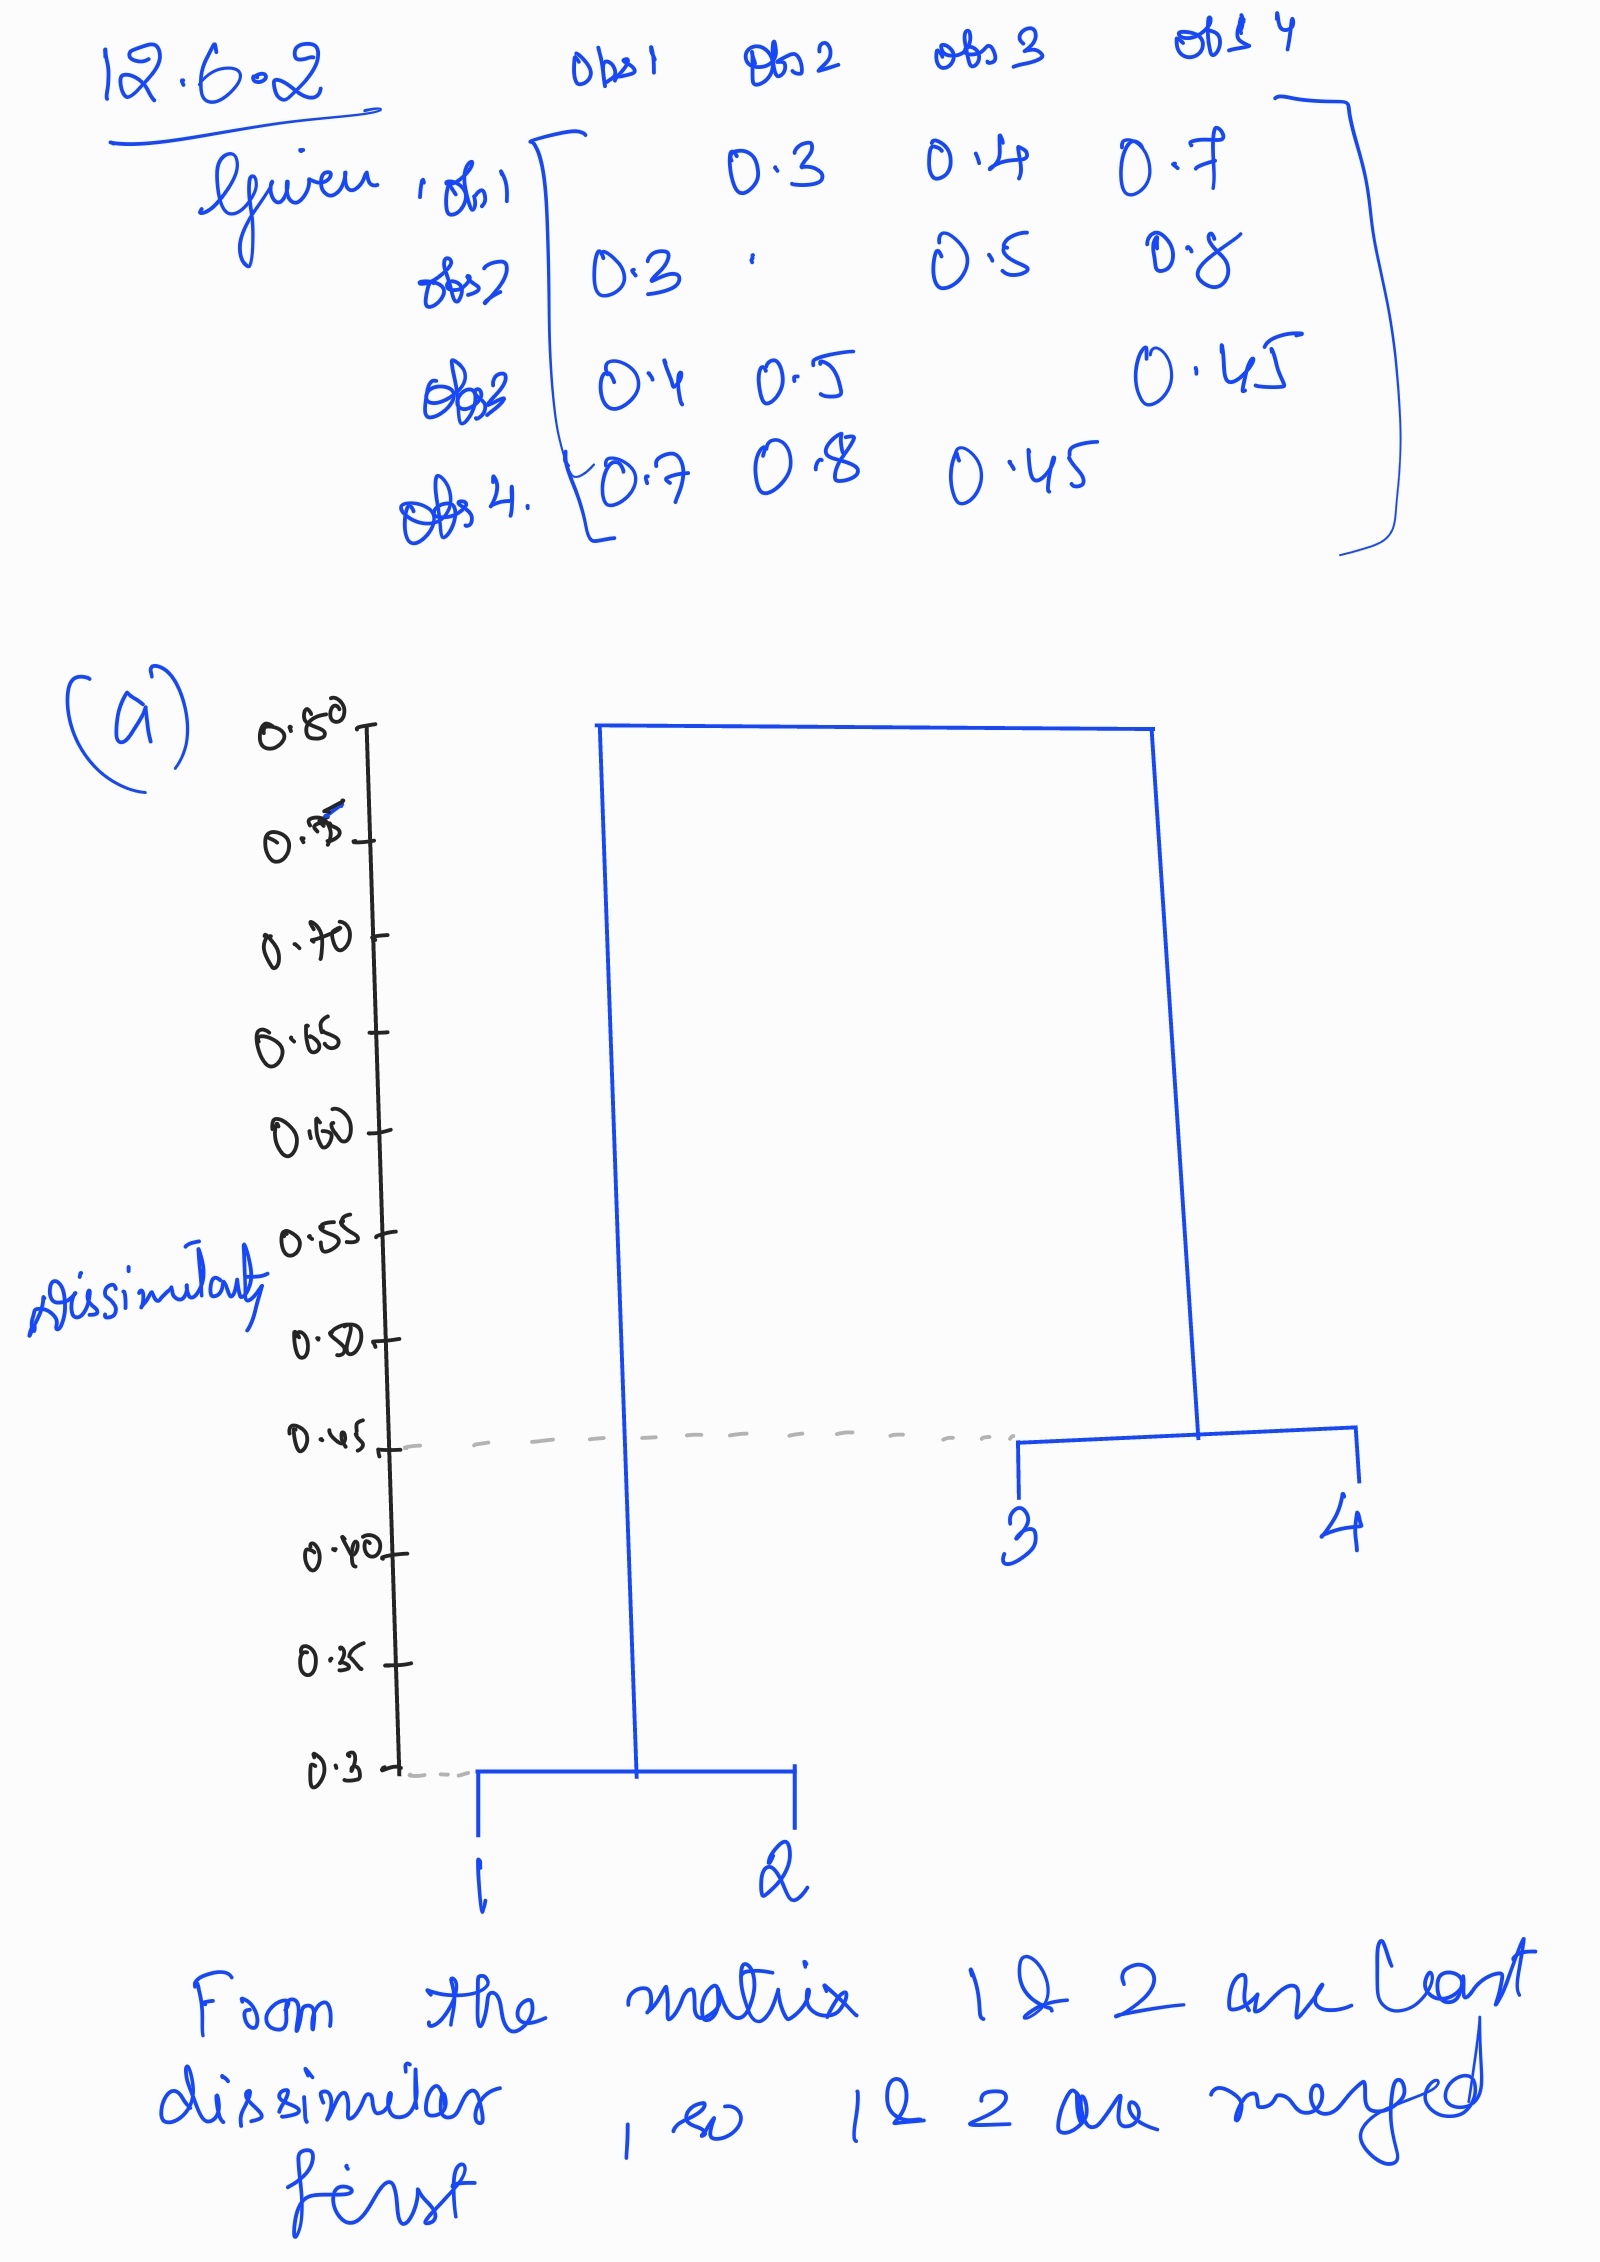

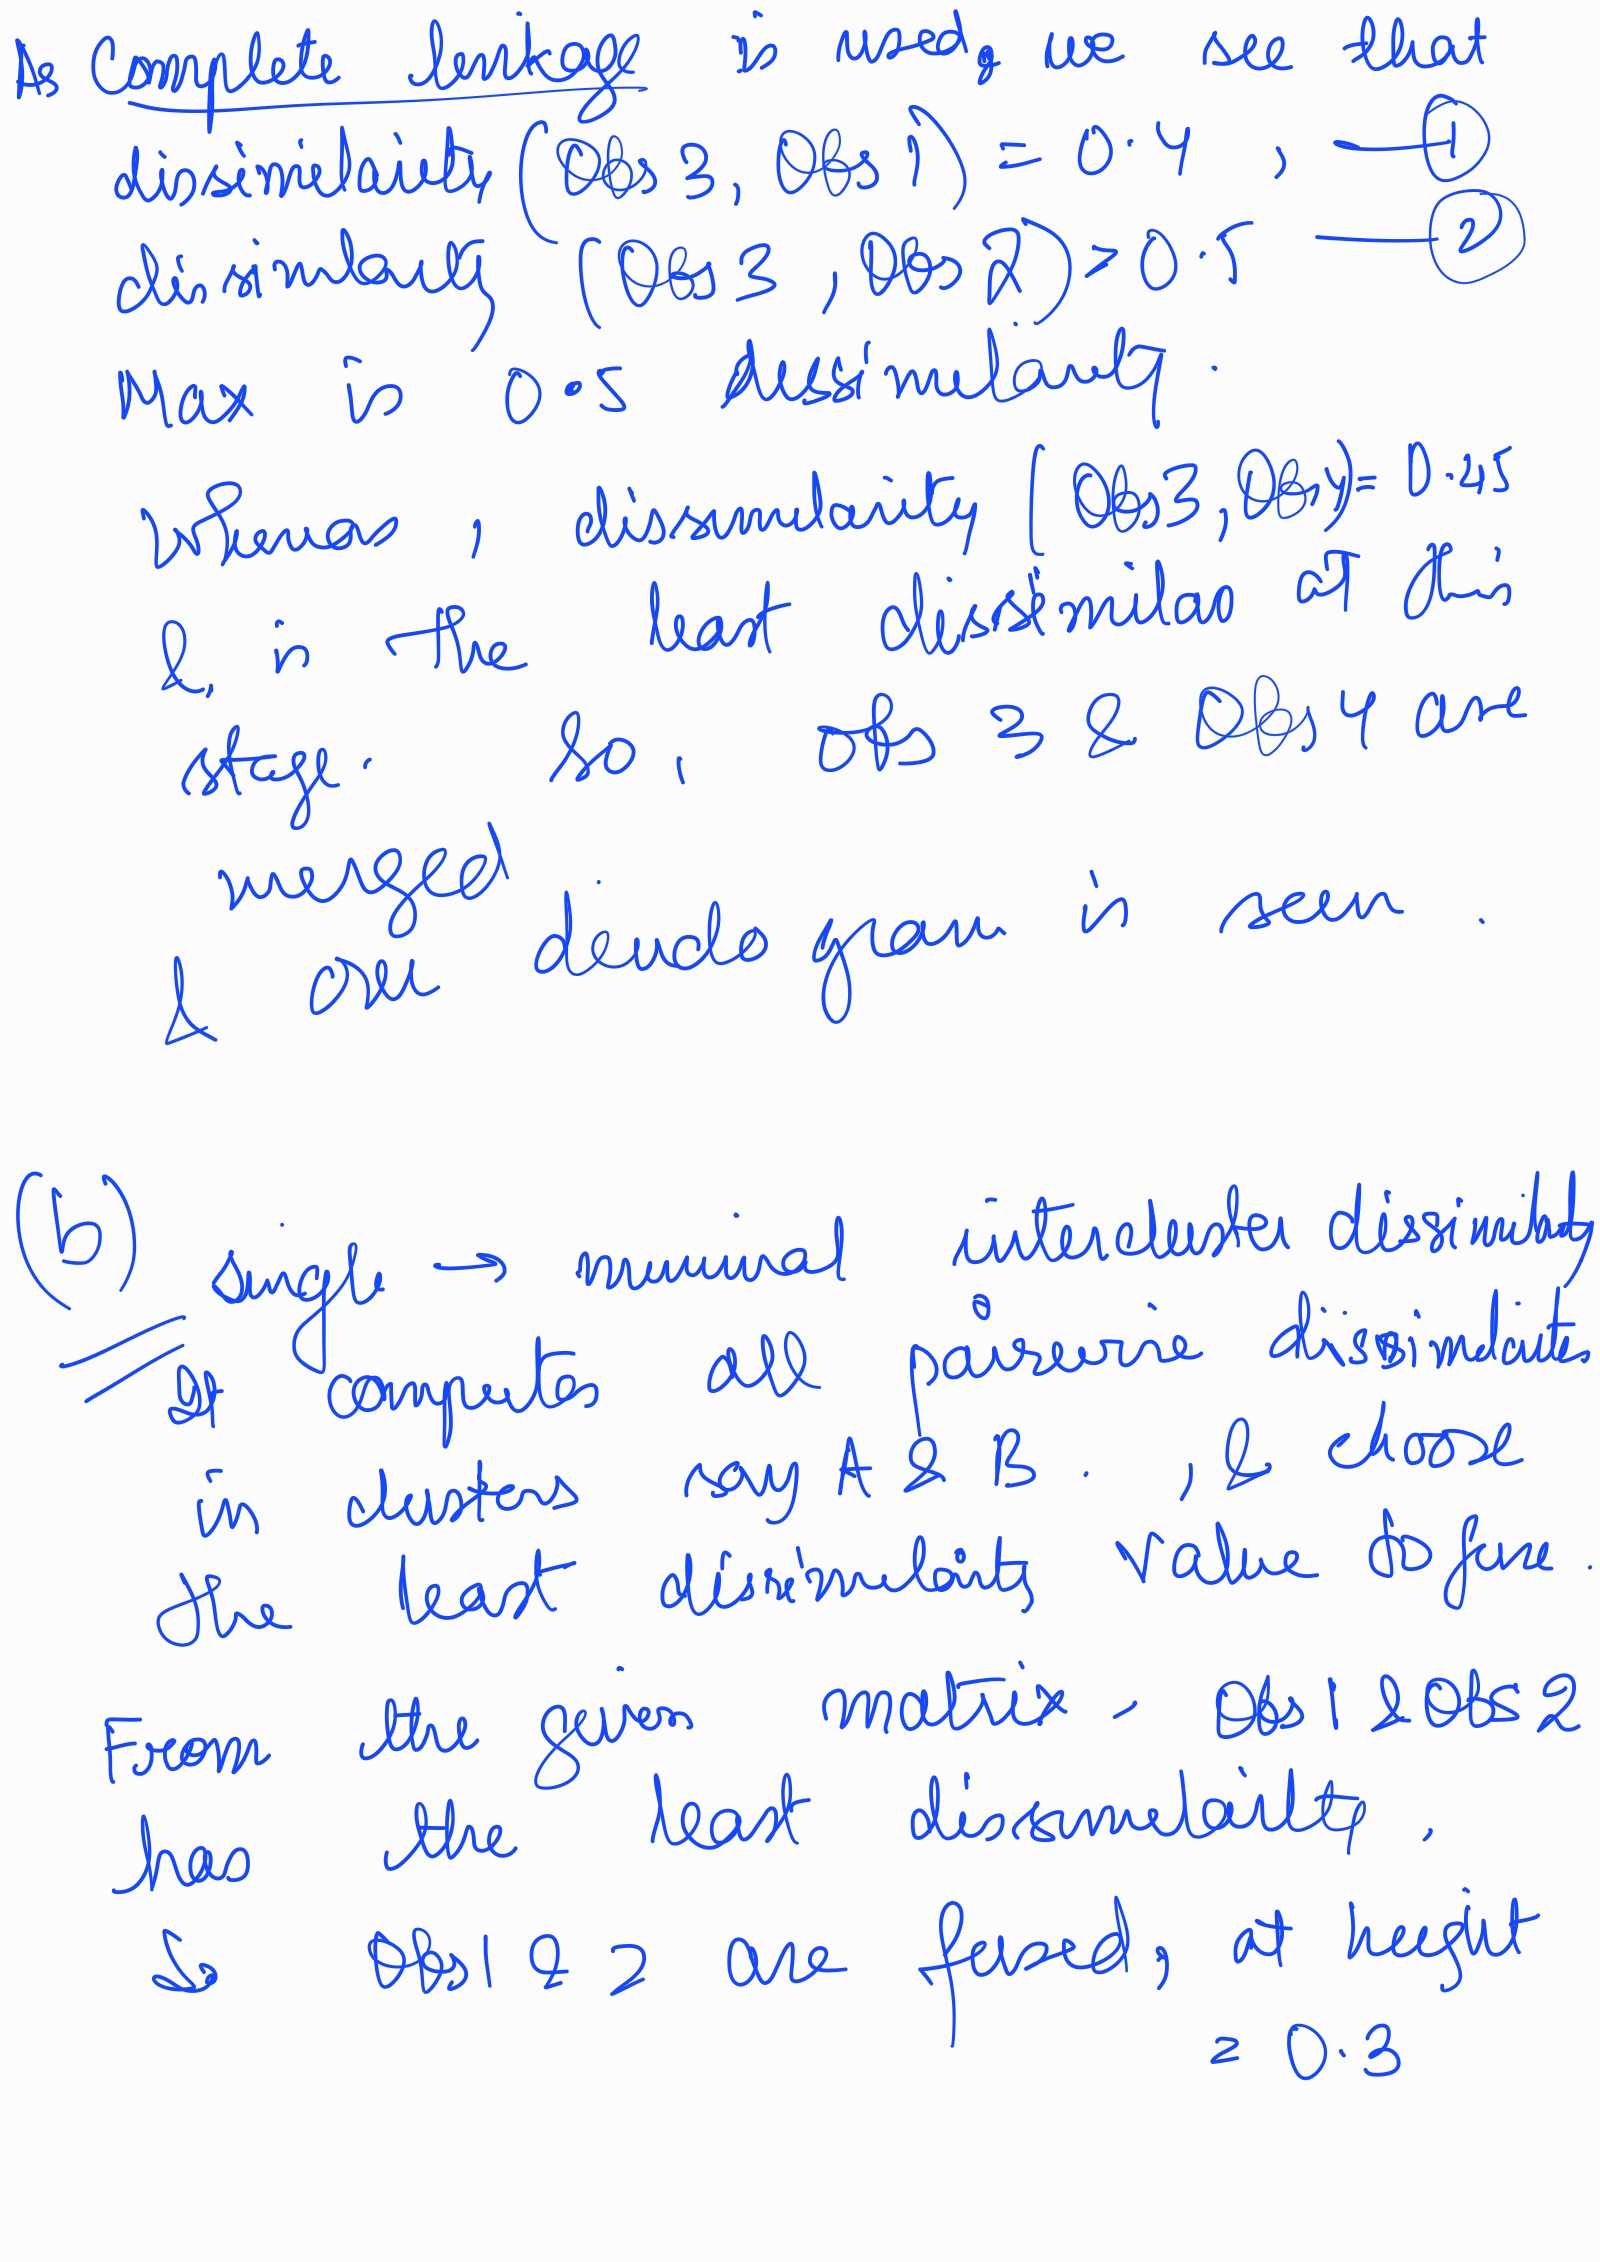

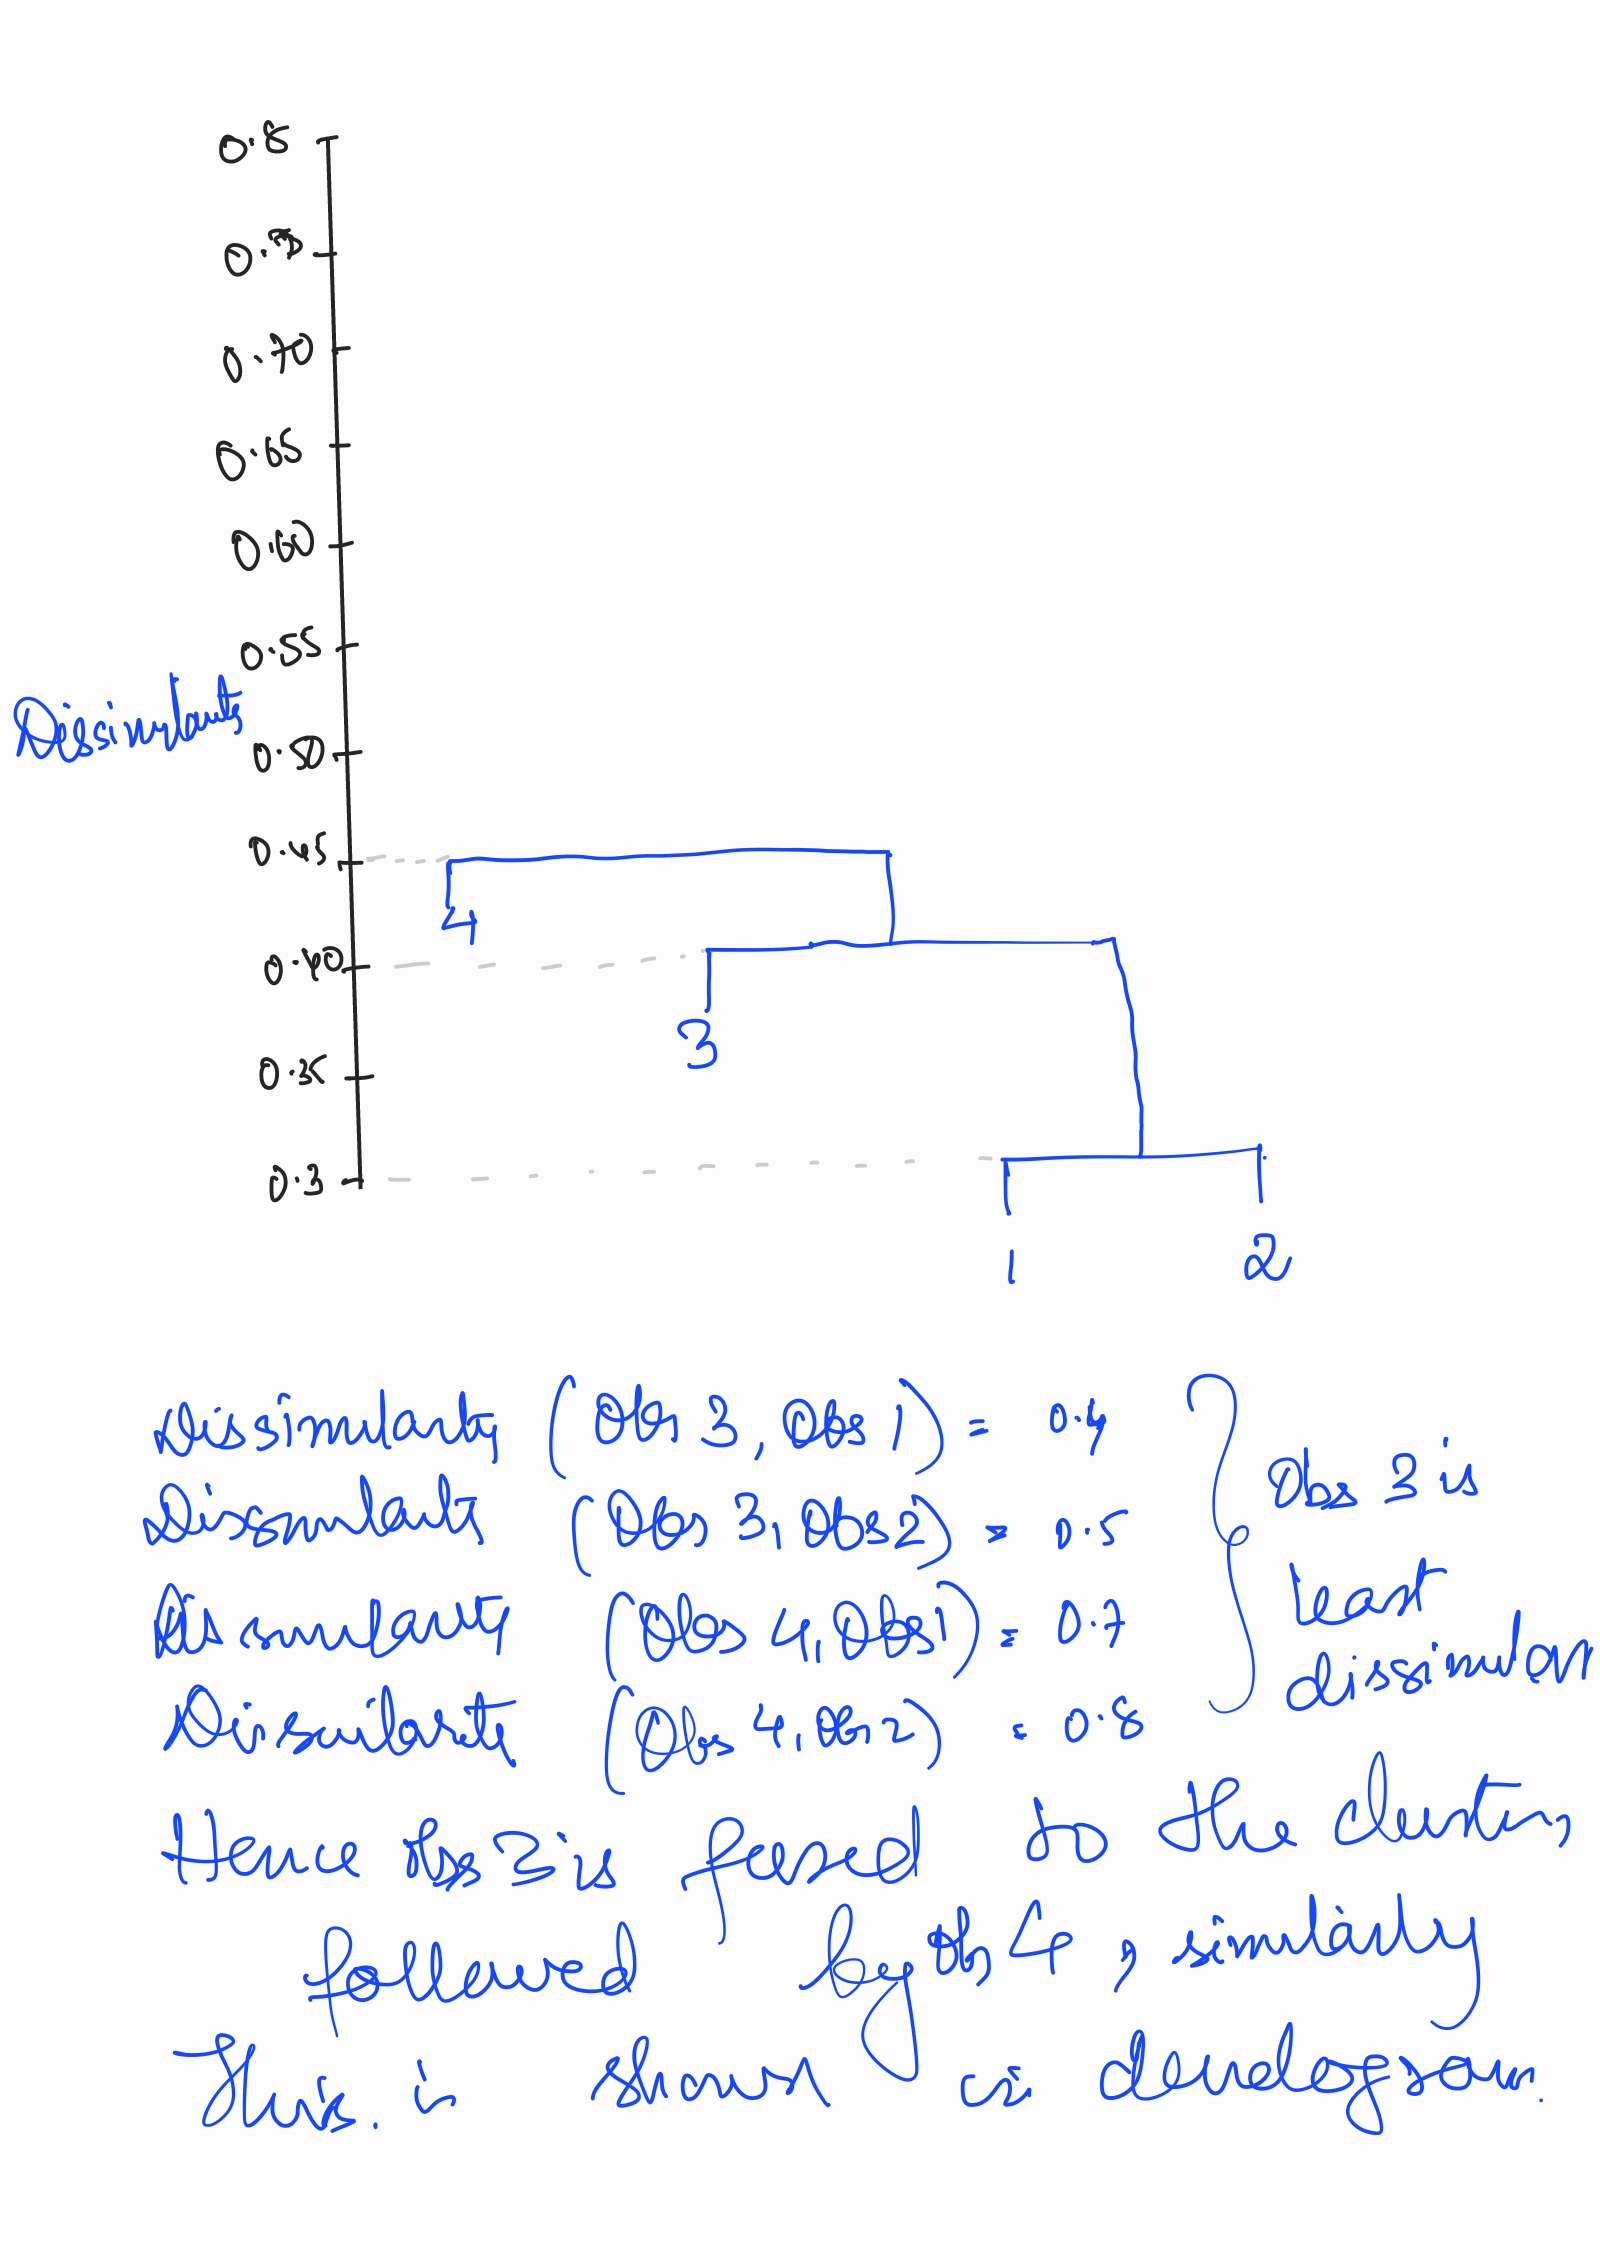

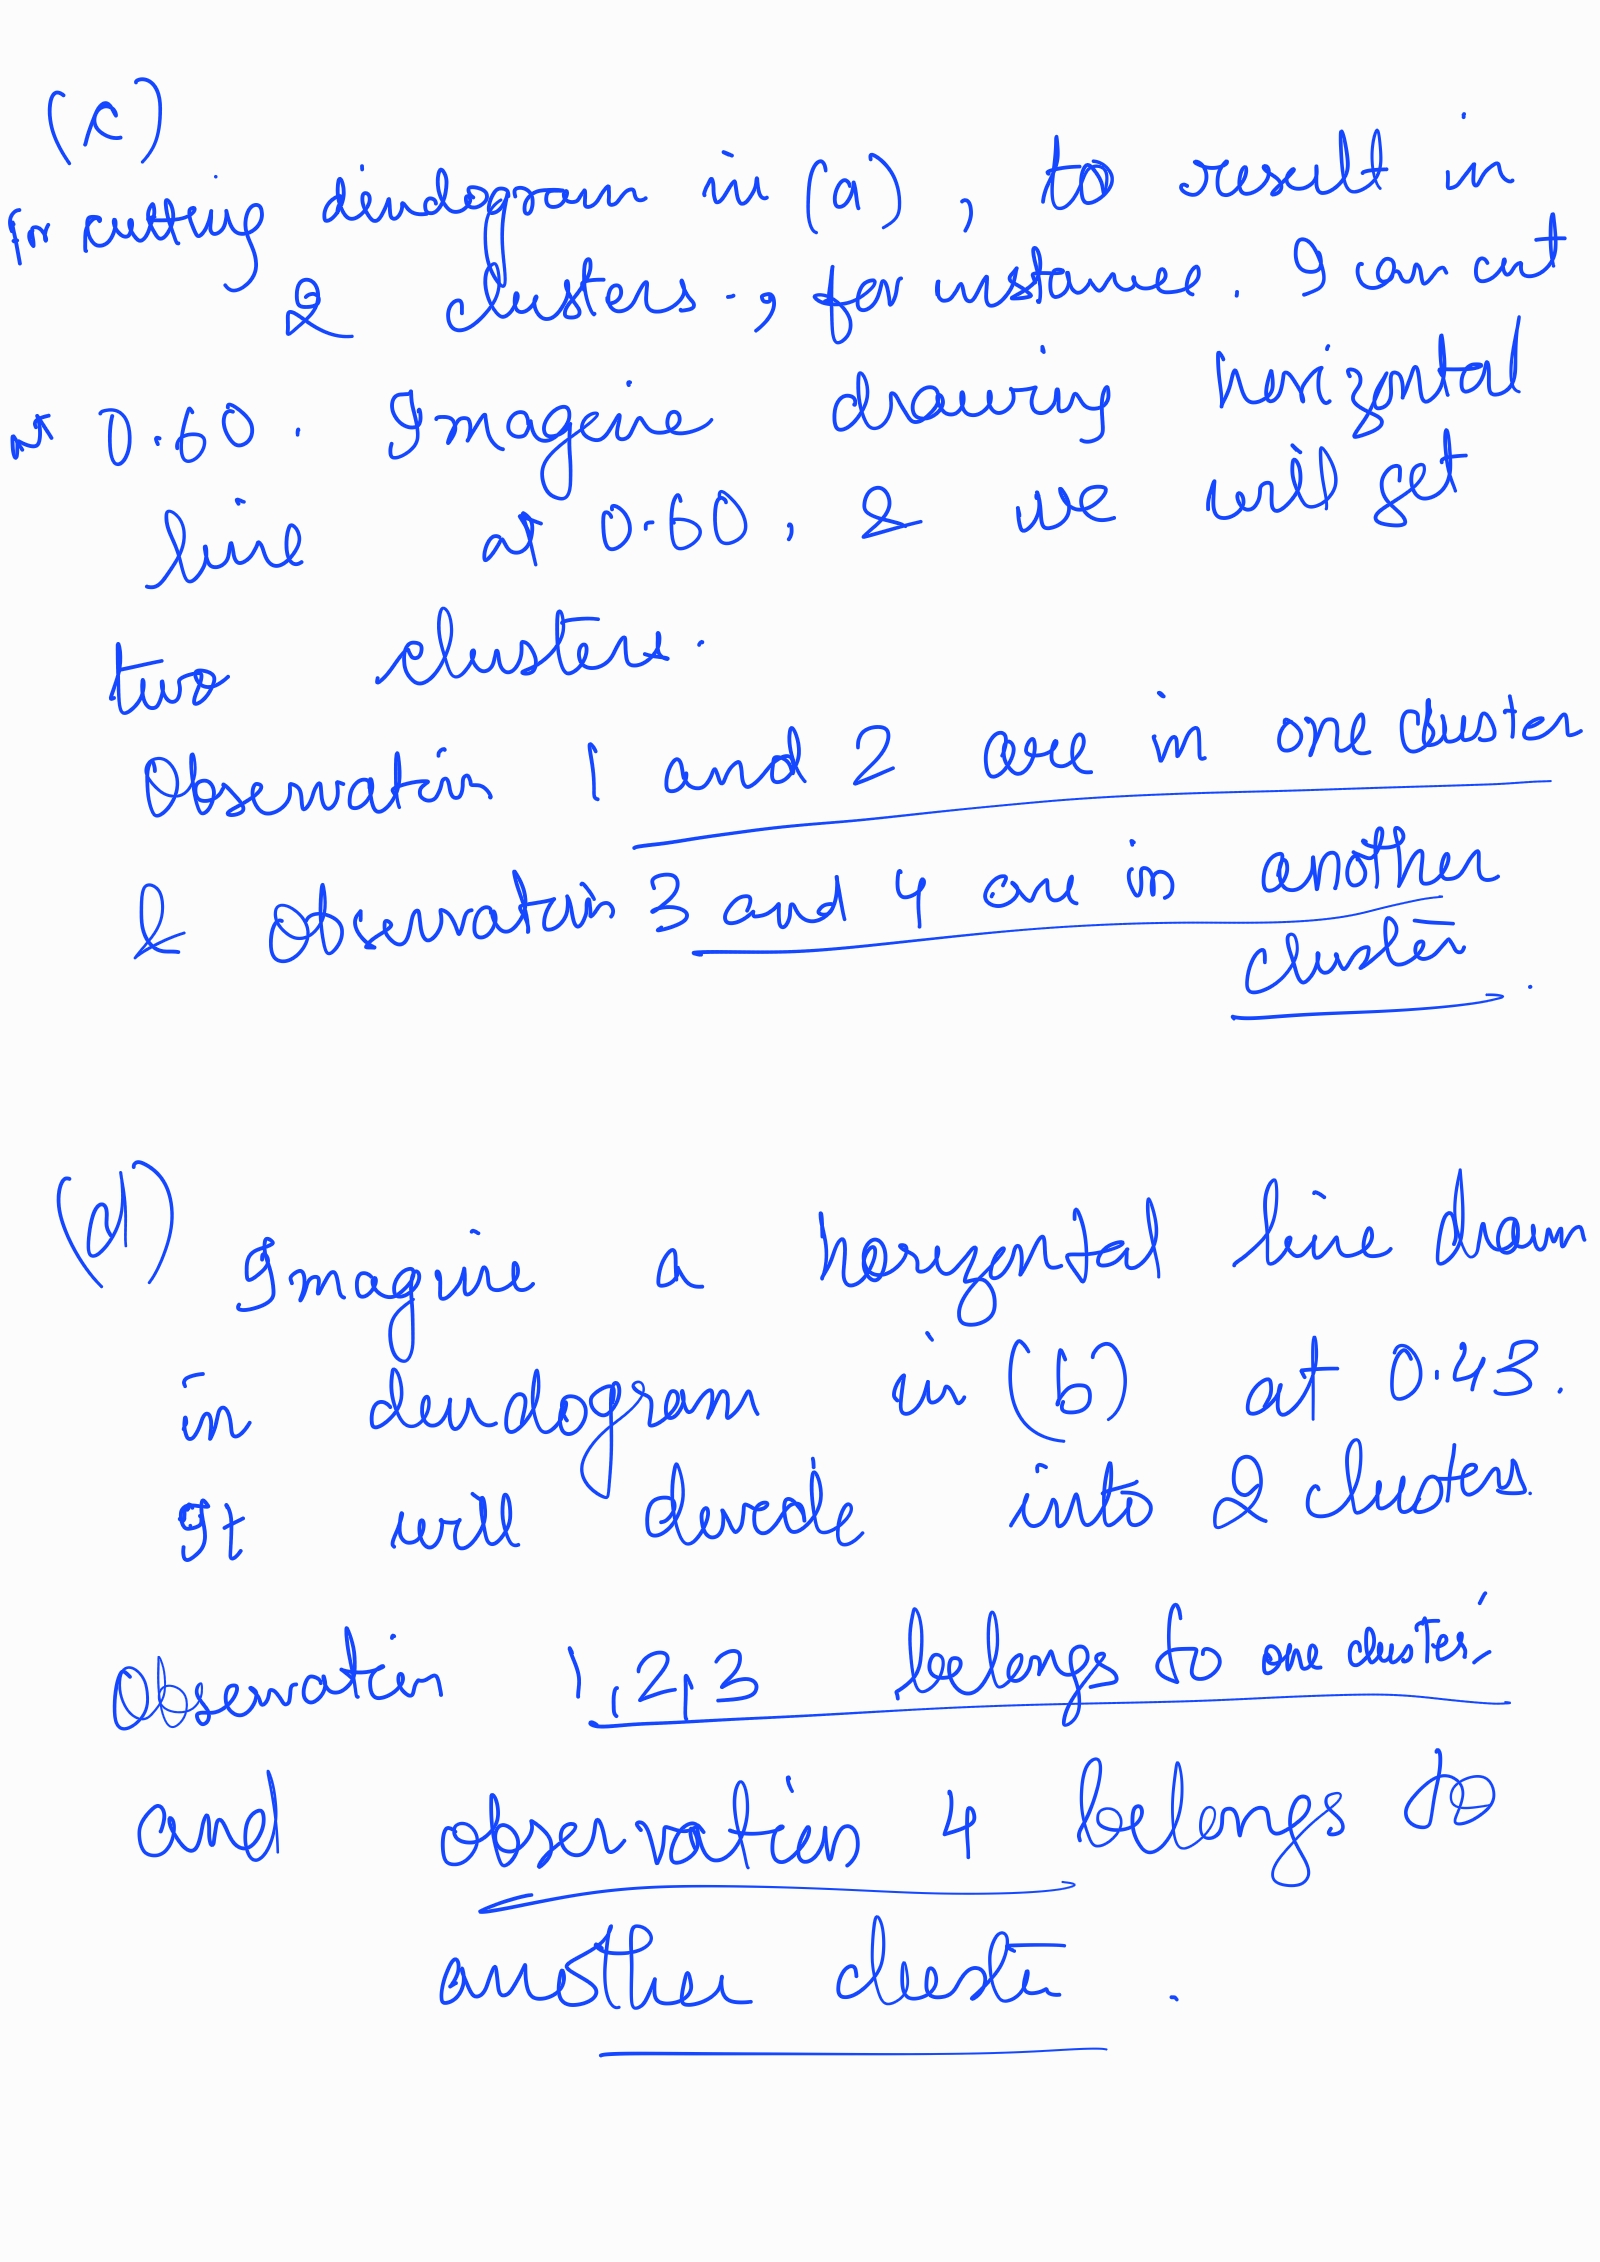

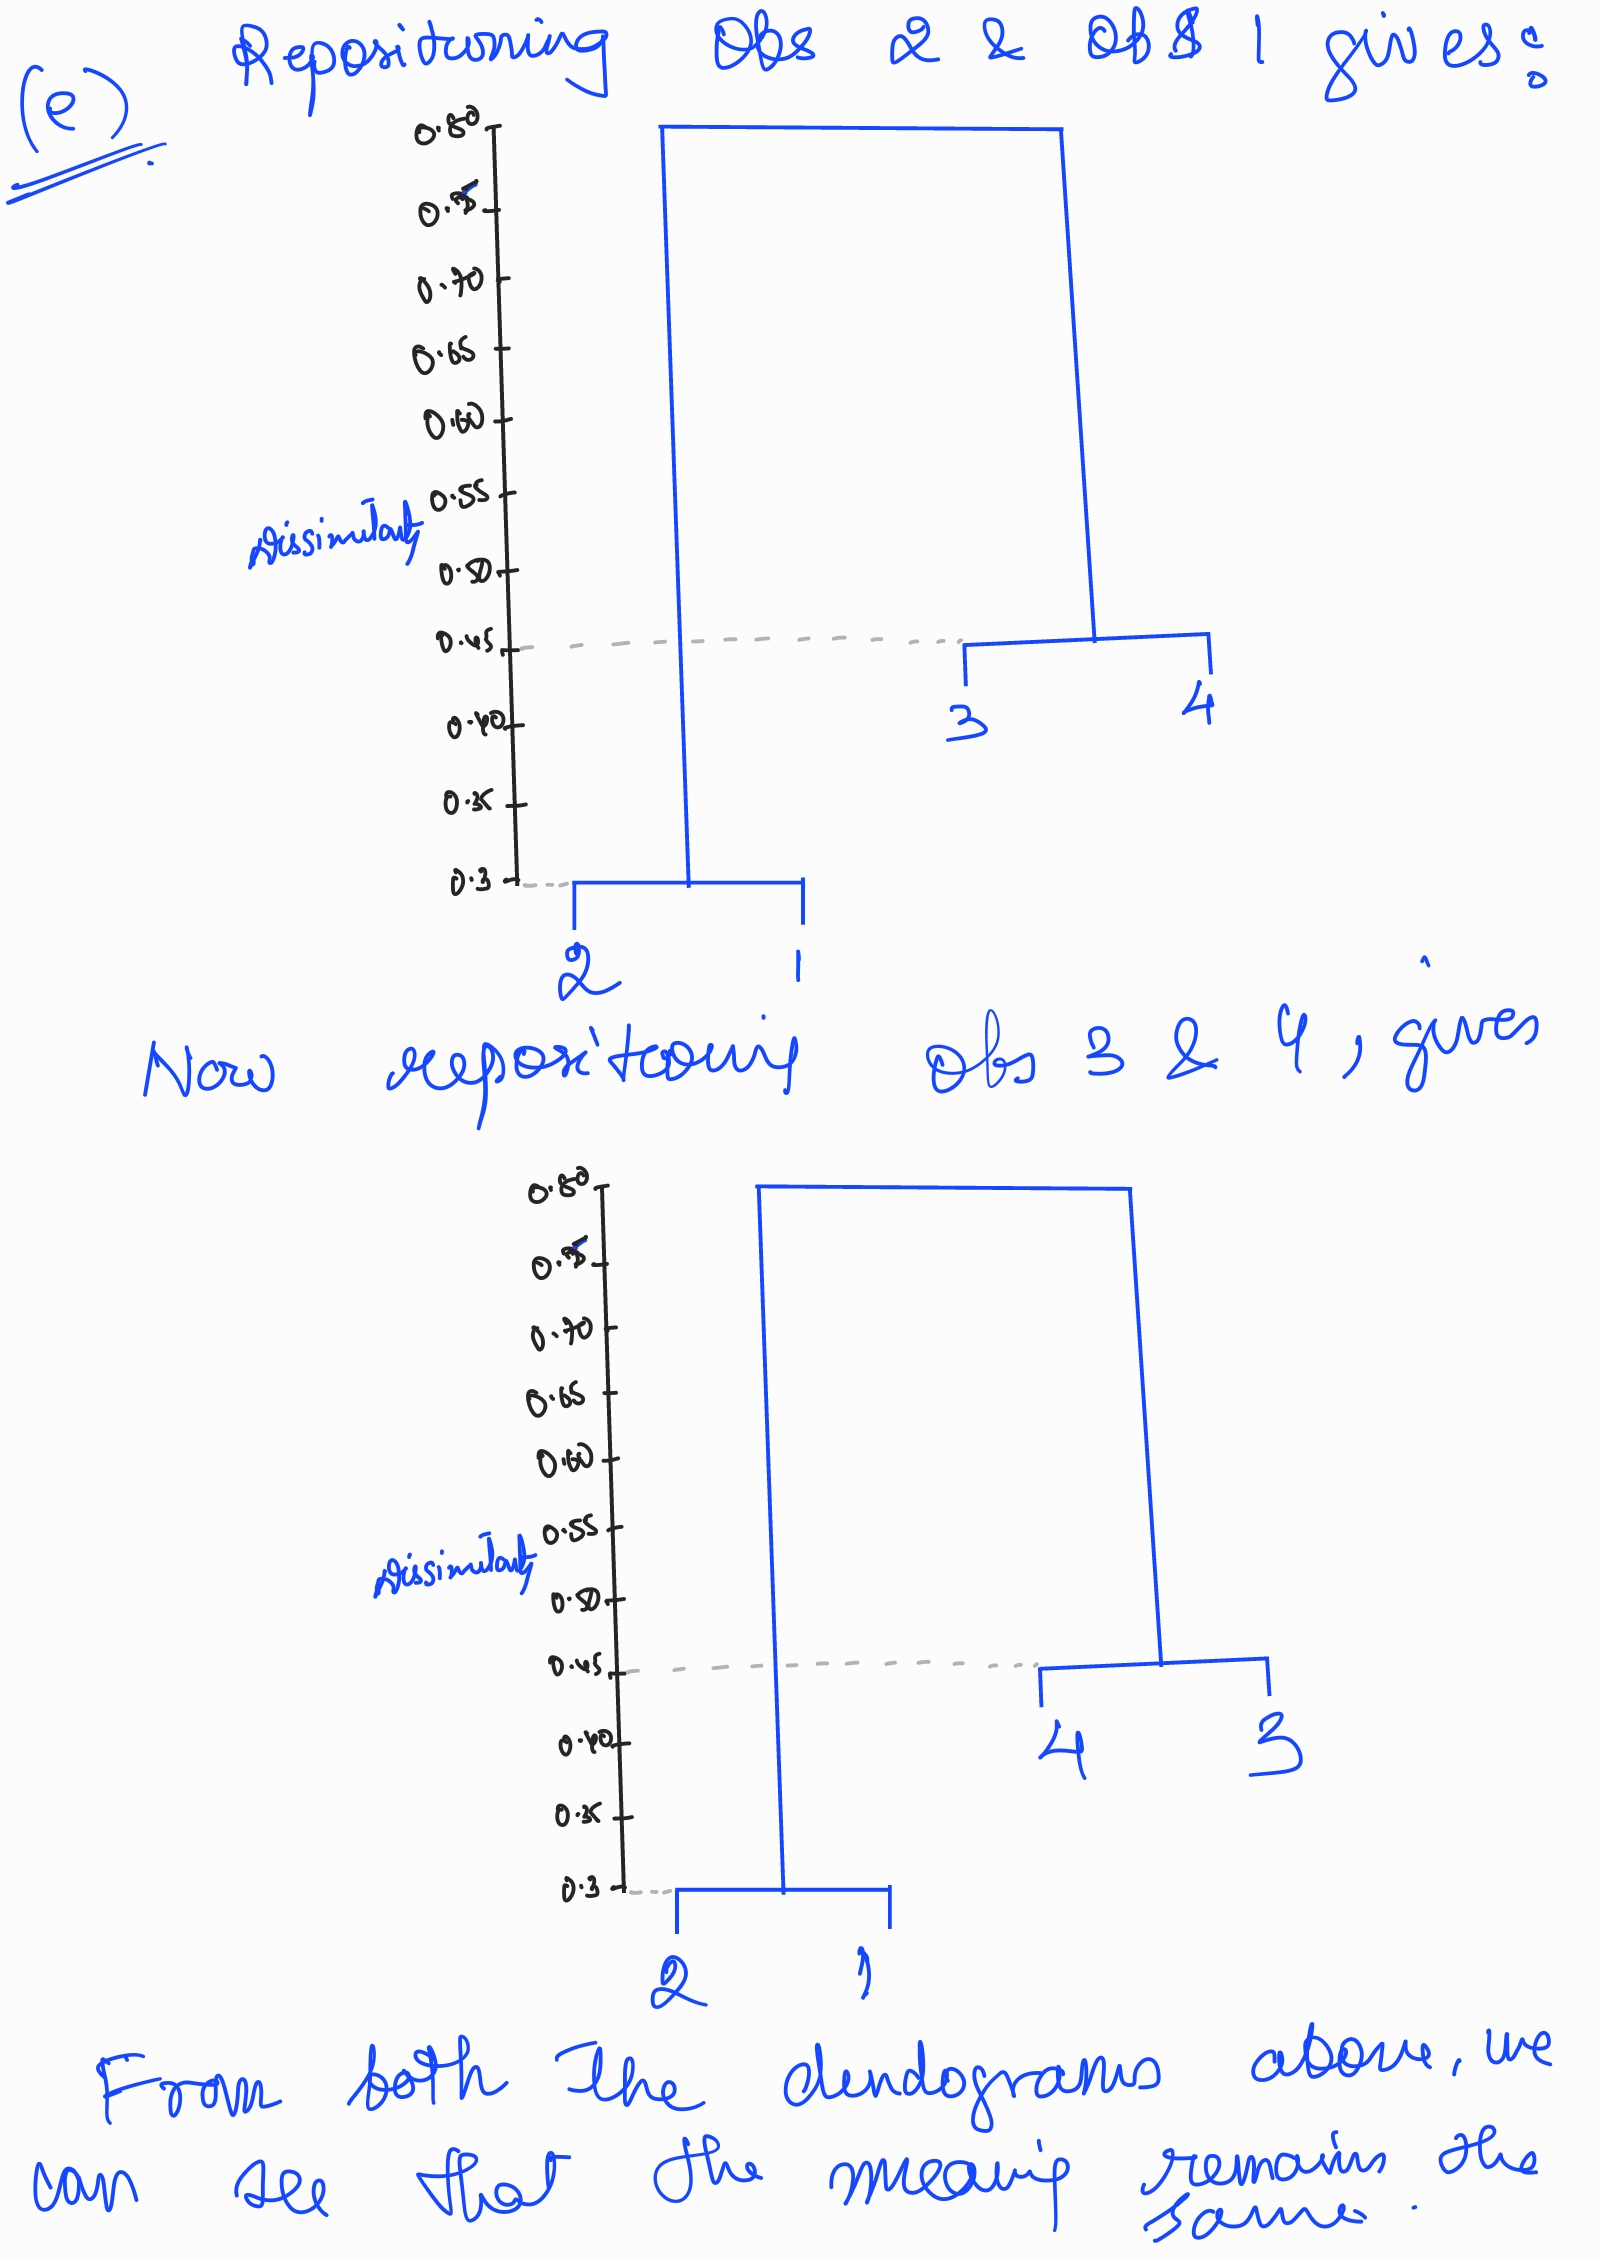